In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualize_prediction(confidence, first_f, last_f, no_features, name_time_column, dataframe, title, location_line, line=False):
    fig, axes = plt.subplots(2, 2, figsize=(15,15), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in range(first_f,last_f):
        sns.scatterplot(data=dataframe, 
                        x=name_time_column, 
                        y=columns[i], 
                        ax=ax[i-first_f], 
                        label="target", 
                        palette="Greys")
        sns.lineplot(data=dataframe, 
                     x=name_time_column, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_f], 
                     label="predicted", 
                     palette="Blues")
        ax[i-first_f].fill_between(dataframe[i+no_features].values - confidence * dataframe[i+2*no_features].values, 
                              dataframe[i+no_features].values + confidence * dataframe[i+2*no_features].values, 
                              alpha=0.2, 
                              color='blue')
        if line:
            ax[i-first_f].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=1, label="train-validation")
        ax[i-first_f].set(xlabel='up time', ylabel='sensor value')
        ax[i-first_f].set(title=columns[i])
        plt.setp(ax[i-first_f].get_xticklabels(), rotation=45) 
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [3]:
def smooth_data(df, rate, columns):
    new_df = pd.DataFrame(columns=["up time", "ongoing time"]+columns)
    for column in columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        new_df.loc[:,column]=smoothed_data
        new_df.loc[:,"up time"] = df.loc[:,"up time"]
        new_df.loc[:,"ongoing time"] = df.loc[:,"ongoing time"]
        
    return new_df

# Visualisation of Prediction - New Machine
## Read data from csv file, which contains all metrics produced during prediction phase

In [4]:
phm_data_1 = pd.read_csv("../files/prediction/MLE/phm_mle_1.csv", sep=";")

In [15]:
phm_data_2 = pd.read_csv("../files/prediction/MLE/phm_mle_2.csv", sep=";")

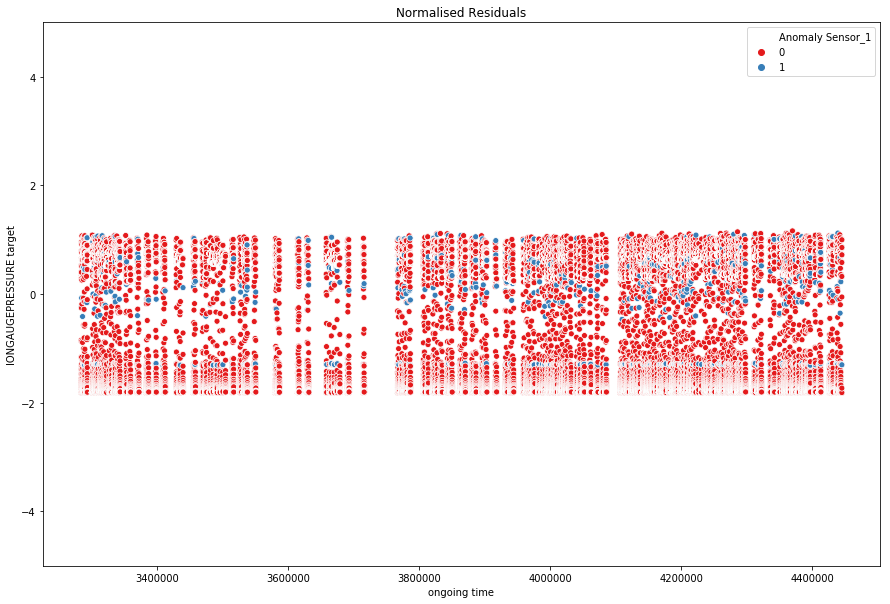

In [5]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=phm_data_1, x="ongoing time", y=phm_data_1.iloc[:,1], hue="Anomaly Sensor_1", palette="Set1")
plt.ylim((-5, 5))
axes.set_title("Normalised Residuals")
plt.show()

## Normalised residuals

In [12]:
# Smooth loss for better visualisation
residuals_smoothed_1=smooth_data(phm_data_1, 0.07, ["normalised residual"])

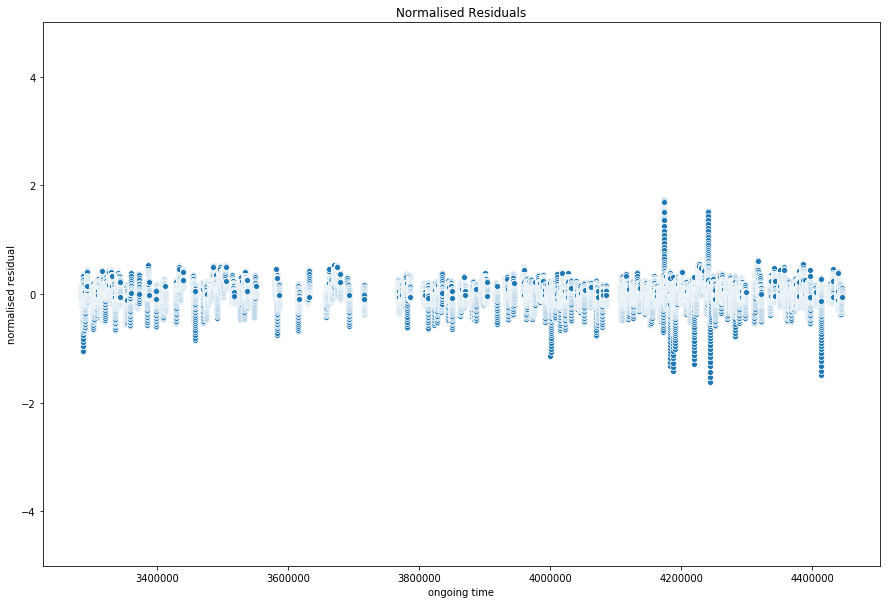

In [13]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=residuals_smoothed_1, x="ongoing time", y="normalised residual")
plt.ylim((-5, 5))
axes.set_title("Normalised Residuals")
plt.show()

In [16]:
# Smooth loss for better visualisation
residuals_smoothed_2=smooth_data(phm_data_2, 0.08, ["normalised residual"])

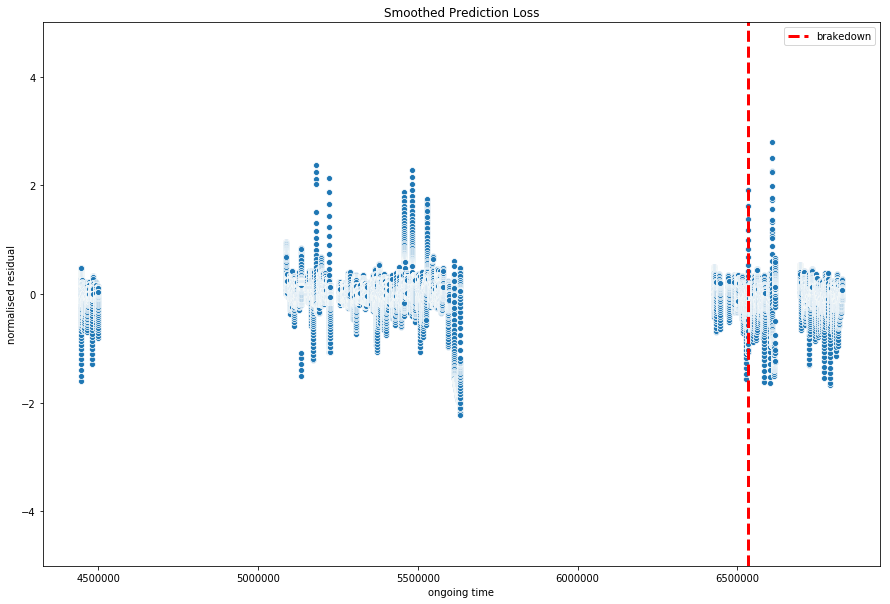

In [17]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=residuals_smoothed_2, x="ongoing time", y="normalised residual")
axes.axvline(6533184, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
plt.ylim((-5, 5))
axes.set_title("Smoothed Prediction Loss")
plt.legend()
plt.show()

KeyError: 14

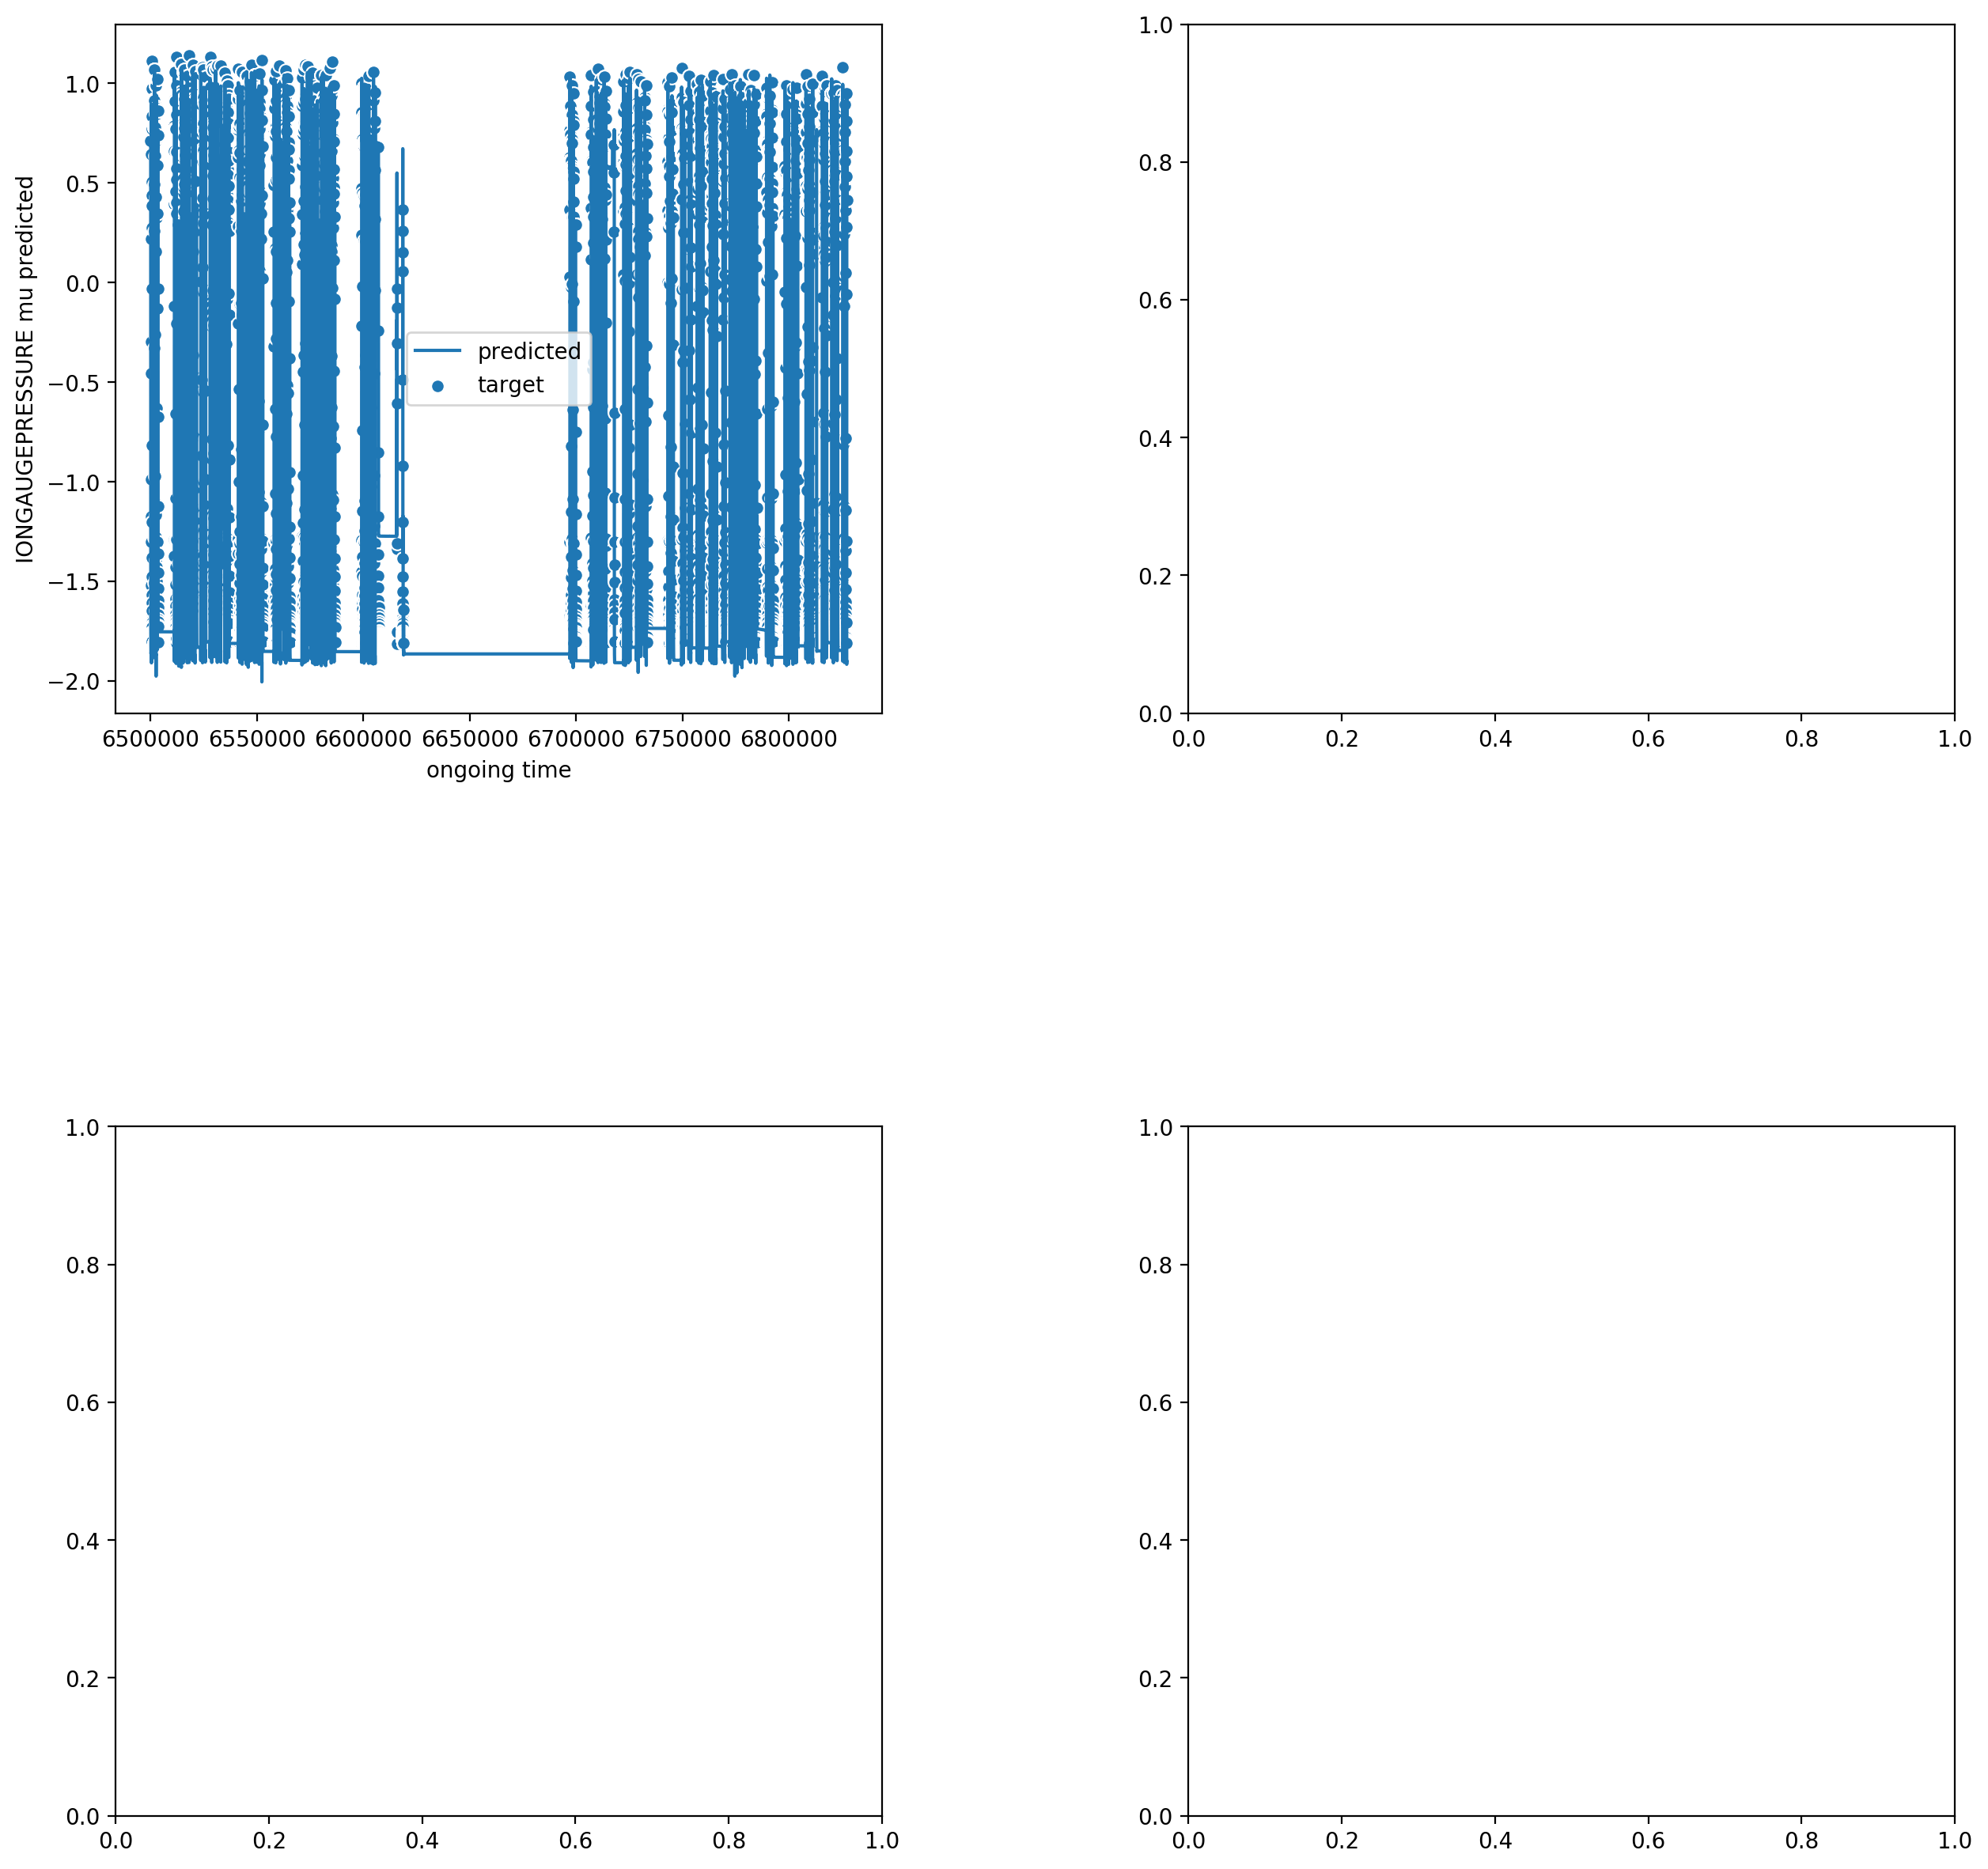

In [35]:
visualize_prediction(confidence=2, 
                     first_f=1, 
                     last_f=5, 
                     no_features=13, 
                     name_time_column="ongoing time", 
                     dataframe=phm_data_2.loc[phm_data_2["ongoing time"]>6500000], 
                     title="", 
                     location_line=6533184, 
                     line=True)

In [19]:
# Smooth loss for better visualisation
loss_smoothed_3=smooth_data(phm_data_3, 0.05, ["loss"])

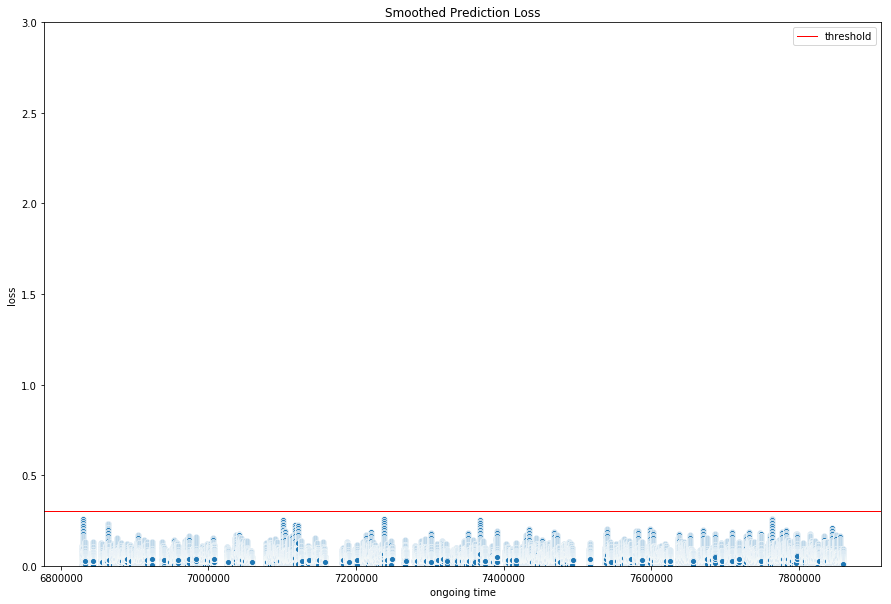

In [25]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=loss_smoothed_3, x="ongoing time", y="loss")
plt.ylim((0, 3))
plt.axhline(0.3, 0,700000, color="r", linestyle ="-", linewidth=1, label="threshold")
axes.set_title("Smoothed Prediction Loss")
plt.legend()
plt.show()

In [12]:
# Smooth loss for better visualisation
loss_smoothed_4=smooth_data(phm_data_4, 0.05, ["loss"])

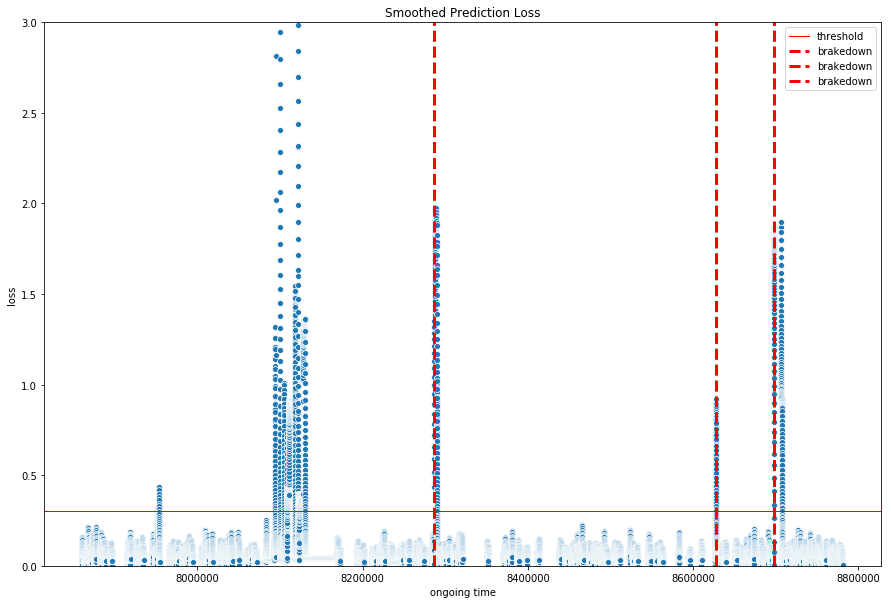

In [13]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=loss_smoothed_4, x="ongoing time", y="loss")
plt.ylim((0, 3))
plt.axhline(0.3, 0,700000, color="r", linestyle ="-", linewidth=1, label="threshold")
axes.axvline(8286500, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
axes.axvline(8627086, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
axes.axvline(8697340, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
axes.set_title("Smoothed Prediction Loss")
plt.legend()
plt.show()

In [14]:
# Smooth loss for better visualisation
loss_smoothed_5=smooth_data(phm_data_5, 0.05, ["loss"])

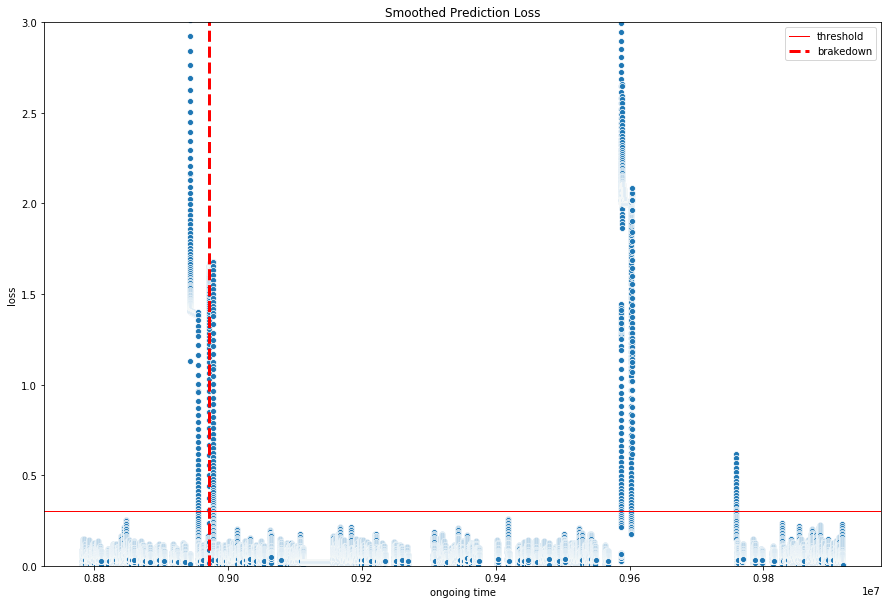

In [16]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=loss_smoothed_5, x="ongoing time", y="loss")
plt.ylim((0, 3))
plt.axhline(0.3, 0,700000, color="r", linestyle ="-", linewidth=1, label="threshold")
axes.axvline(8971484, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
axes.set_title("Smoothed Prediction Loss")
plt.legend()
plt.show()

In [18]:
# Smooth loss for better visualisation
loss_smoothed_6=smooth_data(phm_data_6, 0.05, ["loss"])

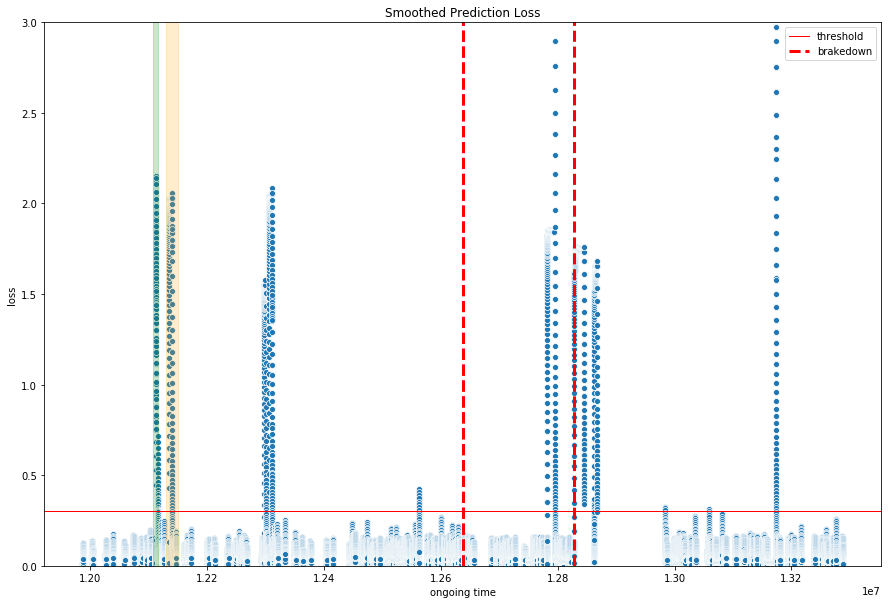

In [84]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data=loss_smoothed_6, x="ongoing time", y="loss")
plt.ylim((0, 3))
plt.axhline(0.3, 0,700000, color="r", linestyle ="-", linewidth=1, label="threshold")
axes.axvline(12638238, 0,2, color="r", linestyle ="--", linewidth=3, label="brakedown")
axes.axvline(12828064, 0,2, color="r", linestyle ="--", linewidth=3)
axes.axvline(12638238, 0,2, color="r", linestyle ="--", linewidth=3, label="")
plt.axvspan(1.2107e7, 1.2115e7, alpha=0.2, color='green')
plt.axvspan(1.213e7, 1.215e7, alpha=0.2, color='orange')
axes.set_title("Smoothed Prediction Loss")
plt.legend()
plt.show()

In [85]:
subset_green = phm_data_6.loc[(phm_data_6["ongoing time"]>1.2107e7) & (phm_data_6["ongoing time"]<1.2115e7)]
subset_green.head()

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,Lot,runnum,recipe,recipe_step,up time,ongoing time,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,FIXTURESHUTTERPOSITION
3641,688742.0,-1.493120,-1.249669,-1.256368,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.45745,...,238,11074281,1,1.0,2754964,12110850,0.14325,-1.047512,-0.559556,0.0
3642,688743.0,-1.492947,-1.249669,-1.256708,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.45745,...,238,11074281,1,1.0,2754968,12110854,0.14325,-1.047512,-0.559556,0.0
3643,688744.0,-1.492852,-1.249669,-1.256640,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.45745,...,238,11074281,1,1.0,2754972,12110858,0.14325,-1.047512,-0.559556,0.0
3644,688745.0,-1.493224,-1.249669,-1.257048,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.45745,...,238,11074281,1,1.0,2754976,12110862,0.14325,-1.047512,-0.559556,0.0
3645,688746.0,-1.493224,-1.249669,-1.256368,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.45745,...,238,11074281,1,1.0,2754980,12110866,0.14325,-1.047512,-0.559556,0.0


In [86]:
subset_orange = phm_data_6.loc[(phm_data_6["ongoing time"]>1.213e7) & (phm_data_6["ongoing time"]<1.215e7)]
subset_orange.head()

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,Lot,runnum,recipe,recipe_step,up time,ongoing time,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,FIXTURESHUTTERPOSITION
6472,691573.0,-1.493204,-1.249669,-1.256844,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.470361,...,234,11075787,1,1.0,2766288,12132342,0.155768,-1.037049,-0.54071,0.0
6473,691574.0,-1.493122,-1.249669,-1.256504,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.470361,...,234,11075787,1,1.0,2766292,12132346,0.155768,-1.037049,-0.54071,0.0
6474,691575.0,-1.493035,-1.249669,-1.256572,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.470361,...,234,11075787,1,1.0,2766296,12132350,0.155768,-1.037049,-0.54071,0.0
6475,691576.0,-1.493654,-1.249669,-1.256504,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.470361,...,234,11075787,1,1.0,2766300,12132354,0.155768,-1.037049,-0.54071,0.0
6476,691577.0,-1.493654,-1.249669,-1.256708,-1.319489,-1.257602,-1.594427,-1.907984,-1.484302,-1.470361,...,234,11075787,1,1.0,2766304,12132358,0.155768,-1.037049,-0.54071,0.0


### Orange Area (Samples wiht "no" sensor values)

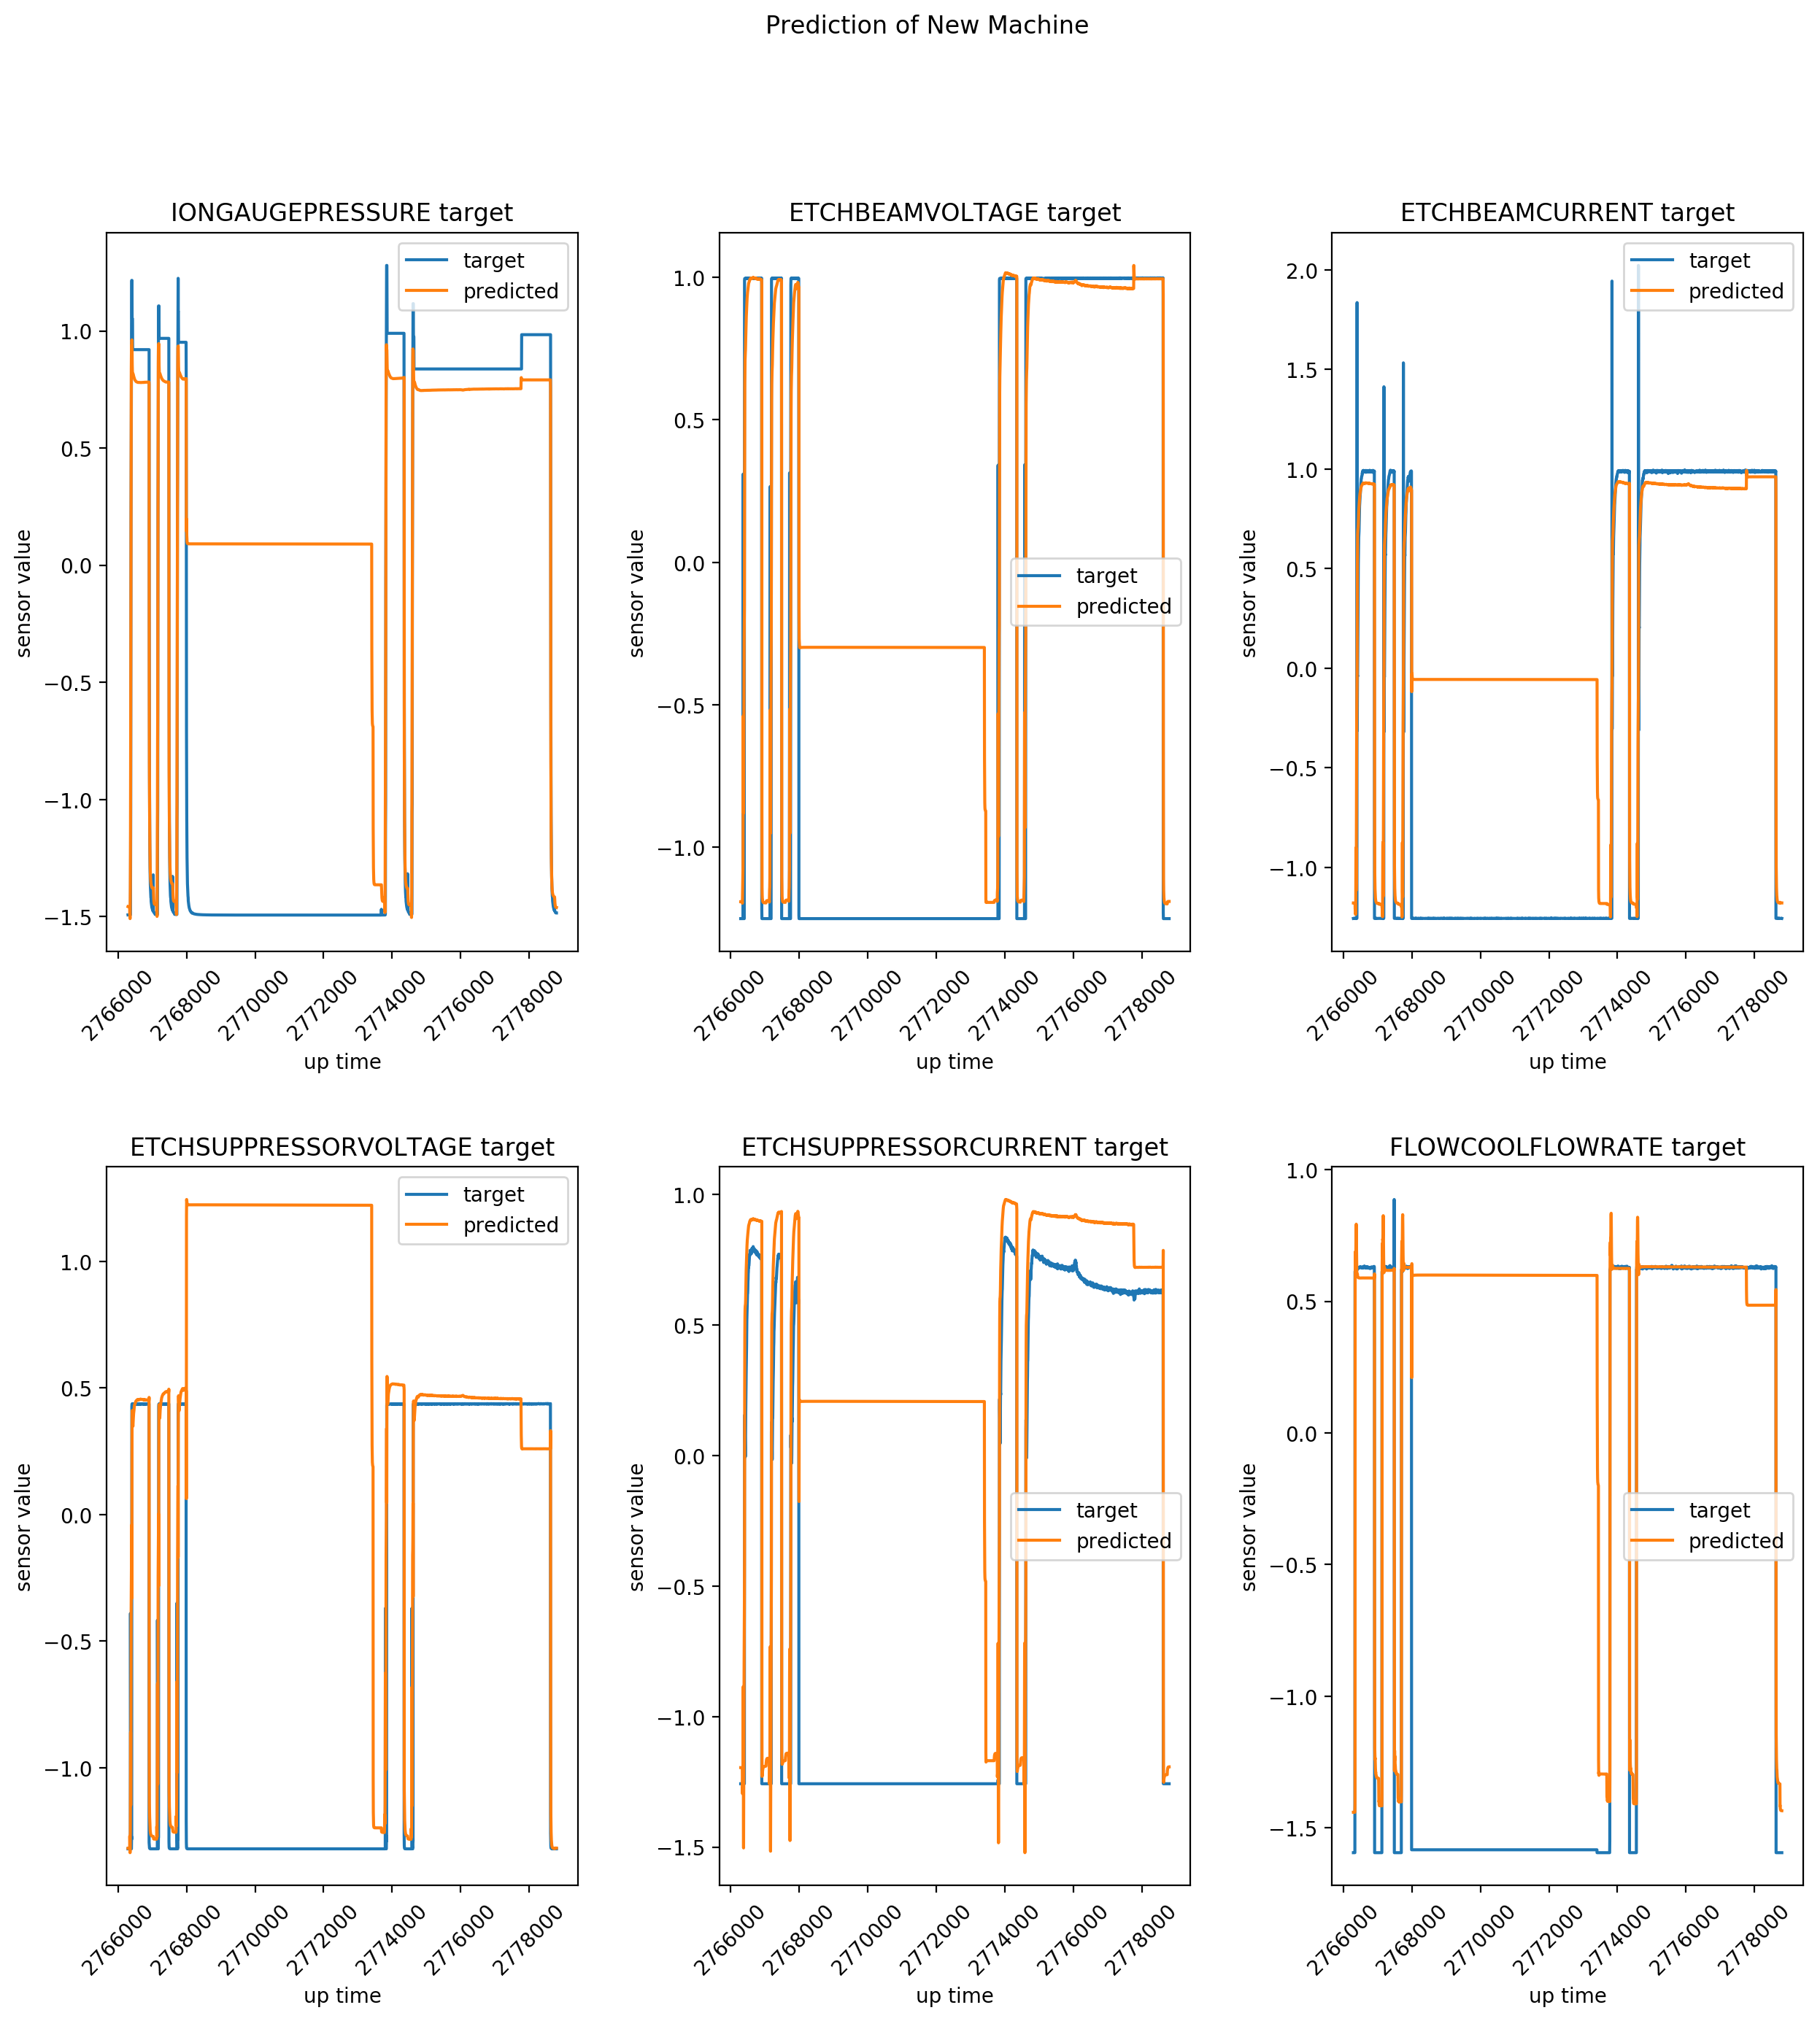

In [109]:
visualize_prediction(first_f=1, 
                     last_f=7, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_orange, 
                     title="Prediction of New Machine", 
                     location_line = 0,
                     type_of_plot = "line",
                     line=False
                    )
plt.show()

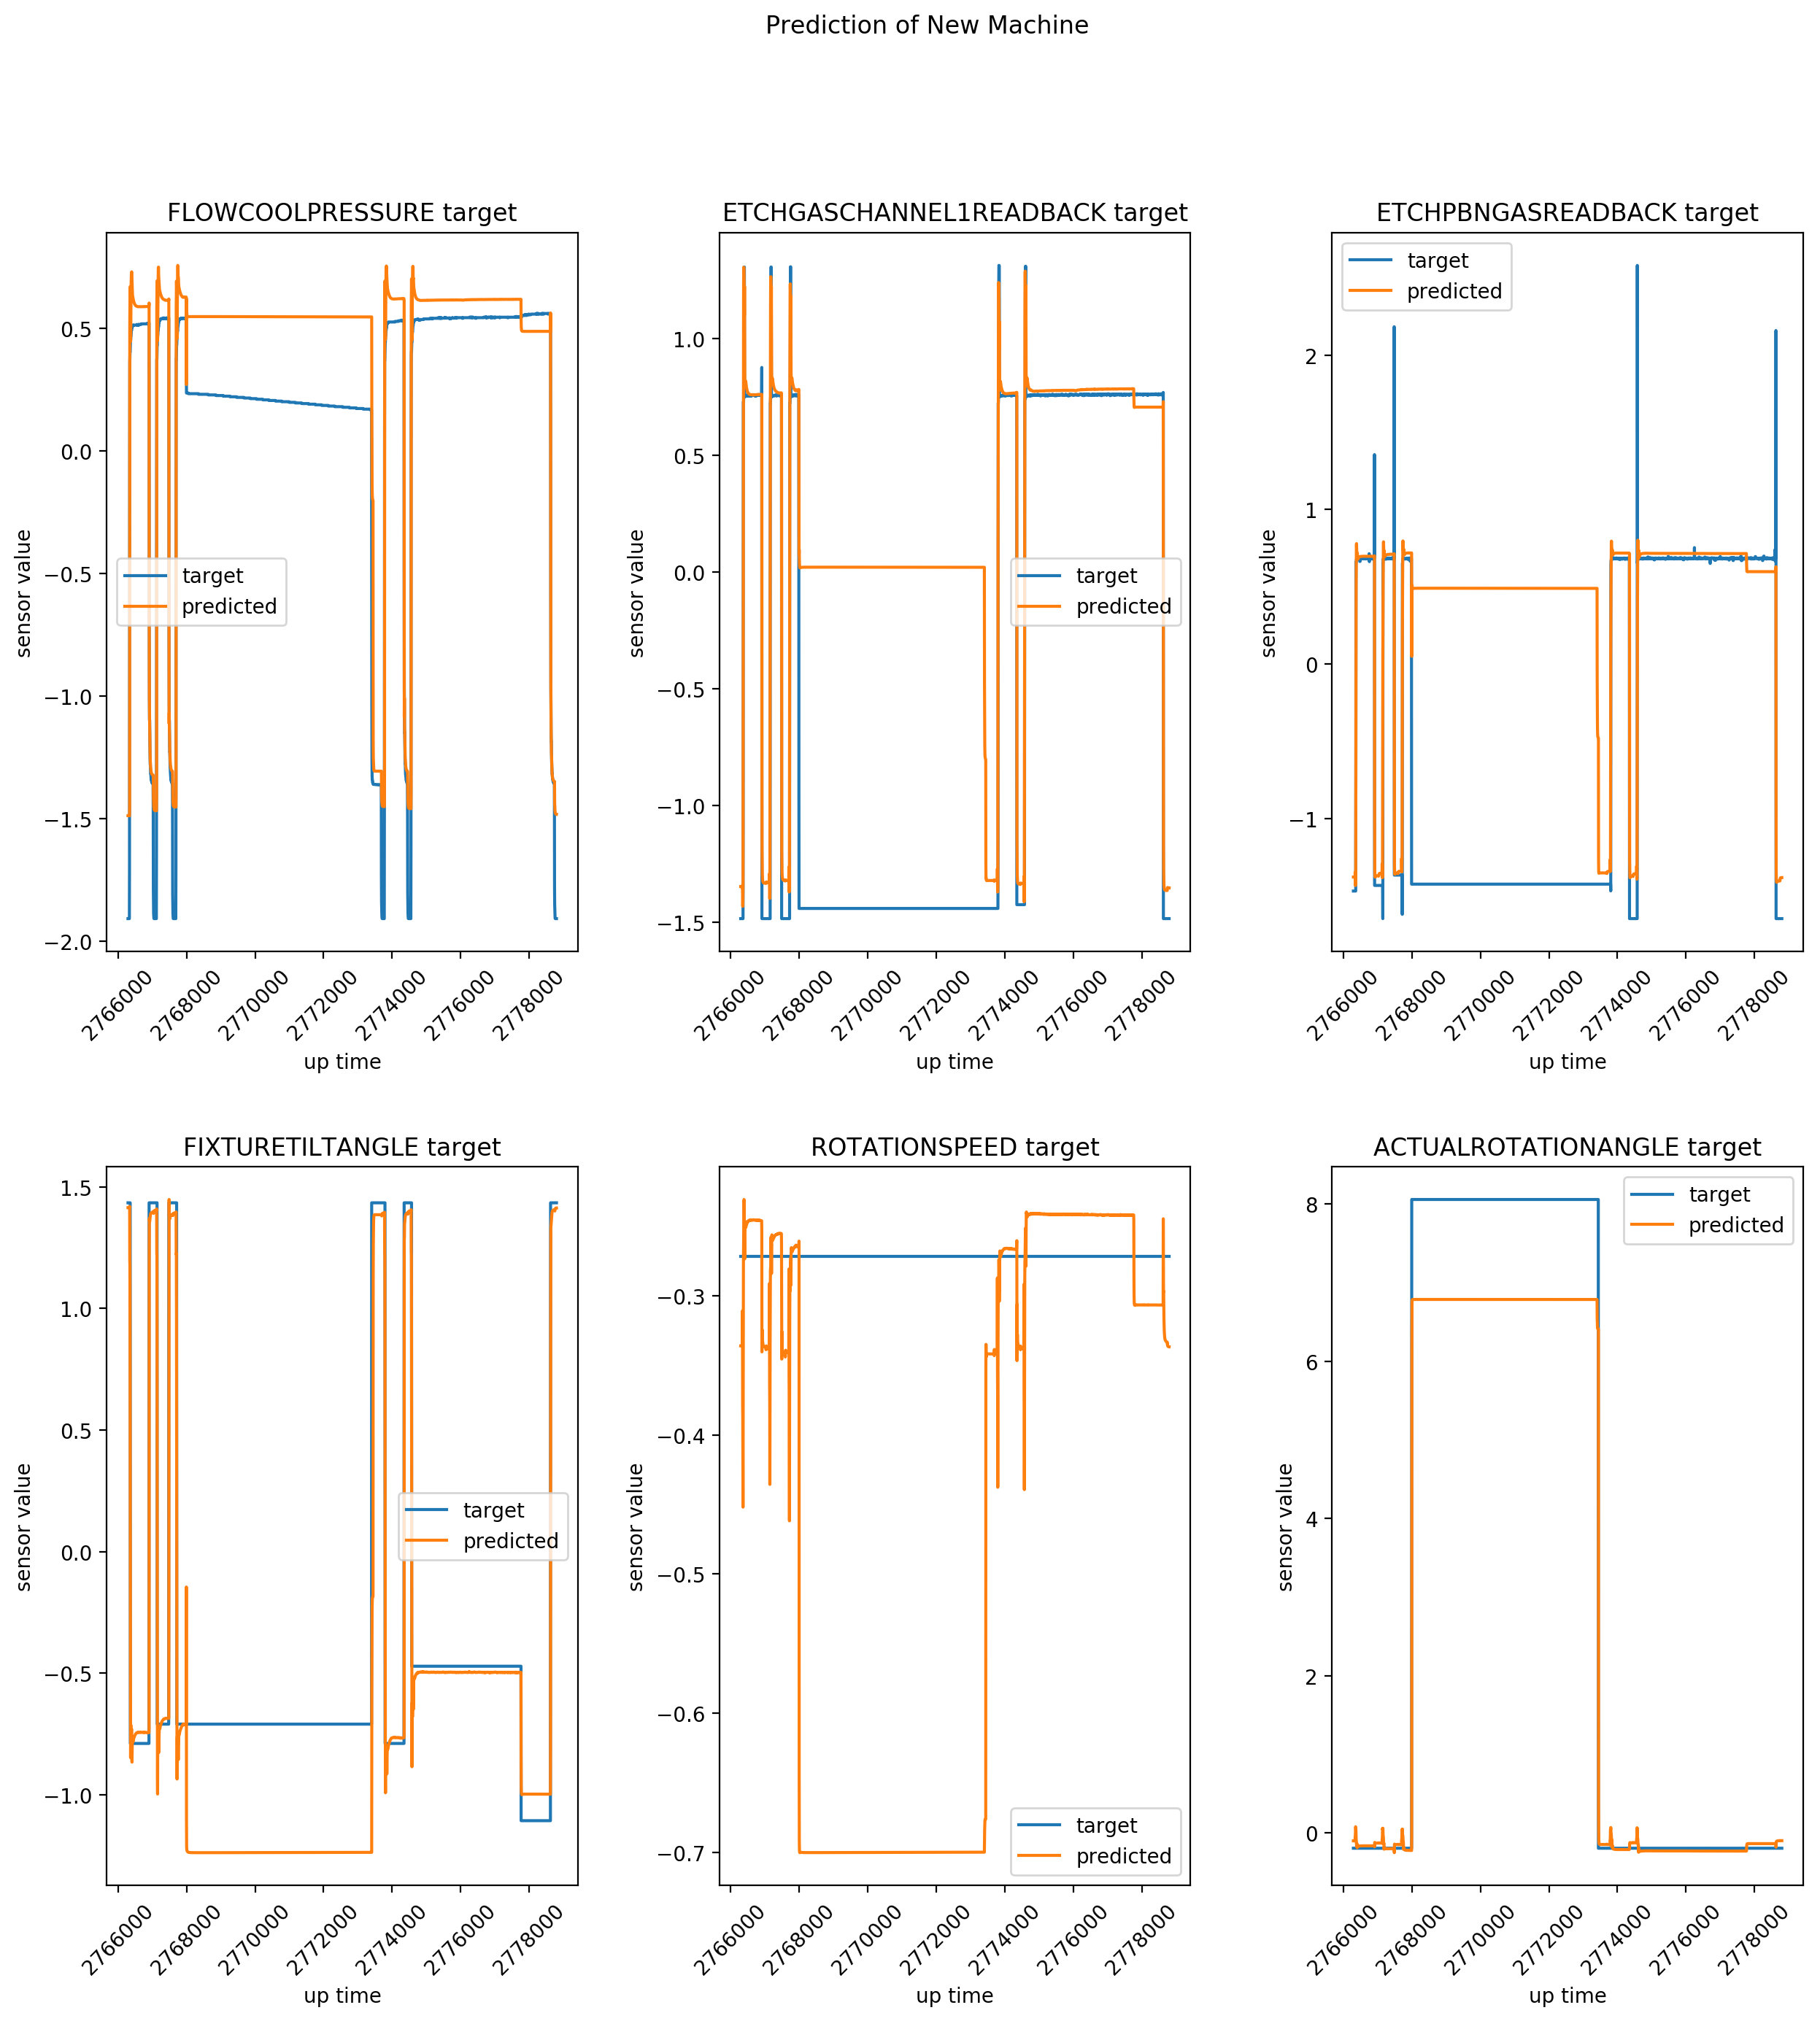

In [92]:
visualize_prediction(first_f=7, 
                     last_f=13, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_orange, 
                     title="Prediction of New Machine", 
                     location_line=0,
                     line=False
                    )
plt.show()

## Other period with long time of no signal

In [8]:
subset_2 = phm_data_2.loc[(phm_data_2["up time"]>430000) & (phm_data_2["up time"]<460000)]
subset_2.head()

,ID,IONGAUGEPRESSURE target,ETCHBEAMVOLTAGE target,ETCHBEAMCURRENT target,ETCHSUPPRESSORVOLTAGE target,ETCHSUPPRESSORCURRENT target,FLOWCOOLFLOWRATE target,FLOWCOOLPRESSURE target,ETCHGASCHANNEL1READBACK target,ETCHPBNGASREADBACK target,...,Lot,runnum,recipe,recipe_step,up time,ongoing time,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,FIXTURESHUTTERPOSITION
7401,107502.0,-1.489723,-1.249669,-1.256436,-1.319489,-1.257602,-1.571648,-1.907984,-1.404726,-1.596631,...,1690,10625110,3,1.0,430004,5112772,-1.669287,0.105823,-1.575539,0.0
7402,107503.0,-1.489723,-1.249669,-1.256232,-1.319489,-1.257602,-1.571648,-1.907984,-1.404726,-1.596631,...,1690,10625110,3,1.0,430008,5112776,-1.669287,0.105823,-1.575539,0.0
7403,107504.0,-1.490011,-1.249669,-1.256232,-1.319489,-1.257602,-1.571648,-1.907984,-1.404726,-1.596631,...,1690,10625110,3,1.0,430012,5112780,-1.669287,0.105823,-1.575539,0.0
7404,107505.0,-1.490011,-1.249669,-1.256300,-1.319489,-1.257602,-1.571648,-1.907984,-1.404726,-1.596631,...,1690,10625110,3,1.0,430016,5112786,-1.669287,0.105823,-1.575539,0.0
7405,107506.0,-1.490011,-1.249669,-1.256095,-1.319489,-1.257602,-1.571648,-1.907984,-1.404726,-1.596631,...,1690,10625110,3,1.0,430020,5112788,-1.669287,0.105823,-1.575539,0.0


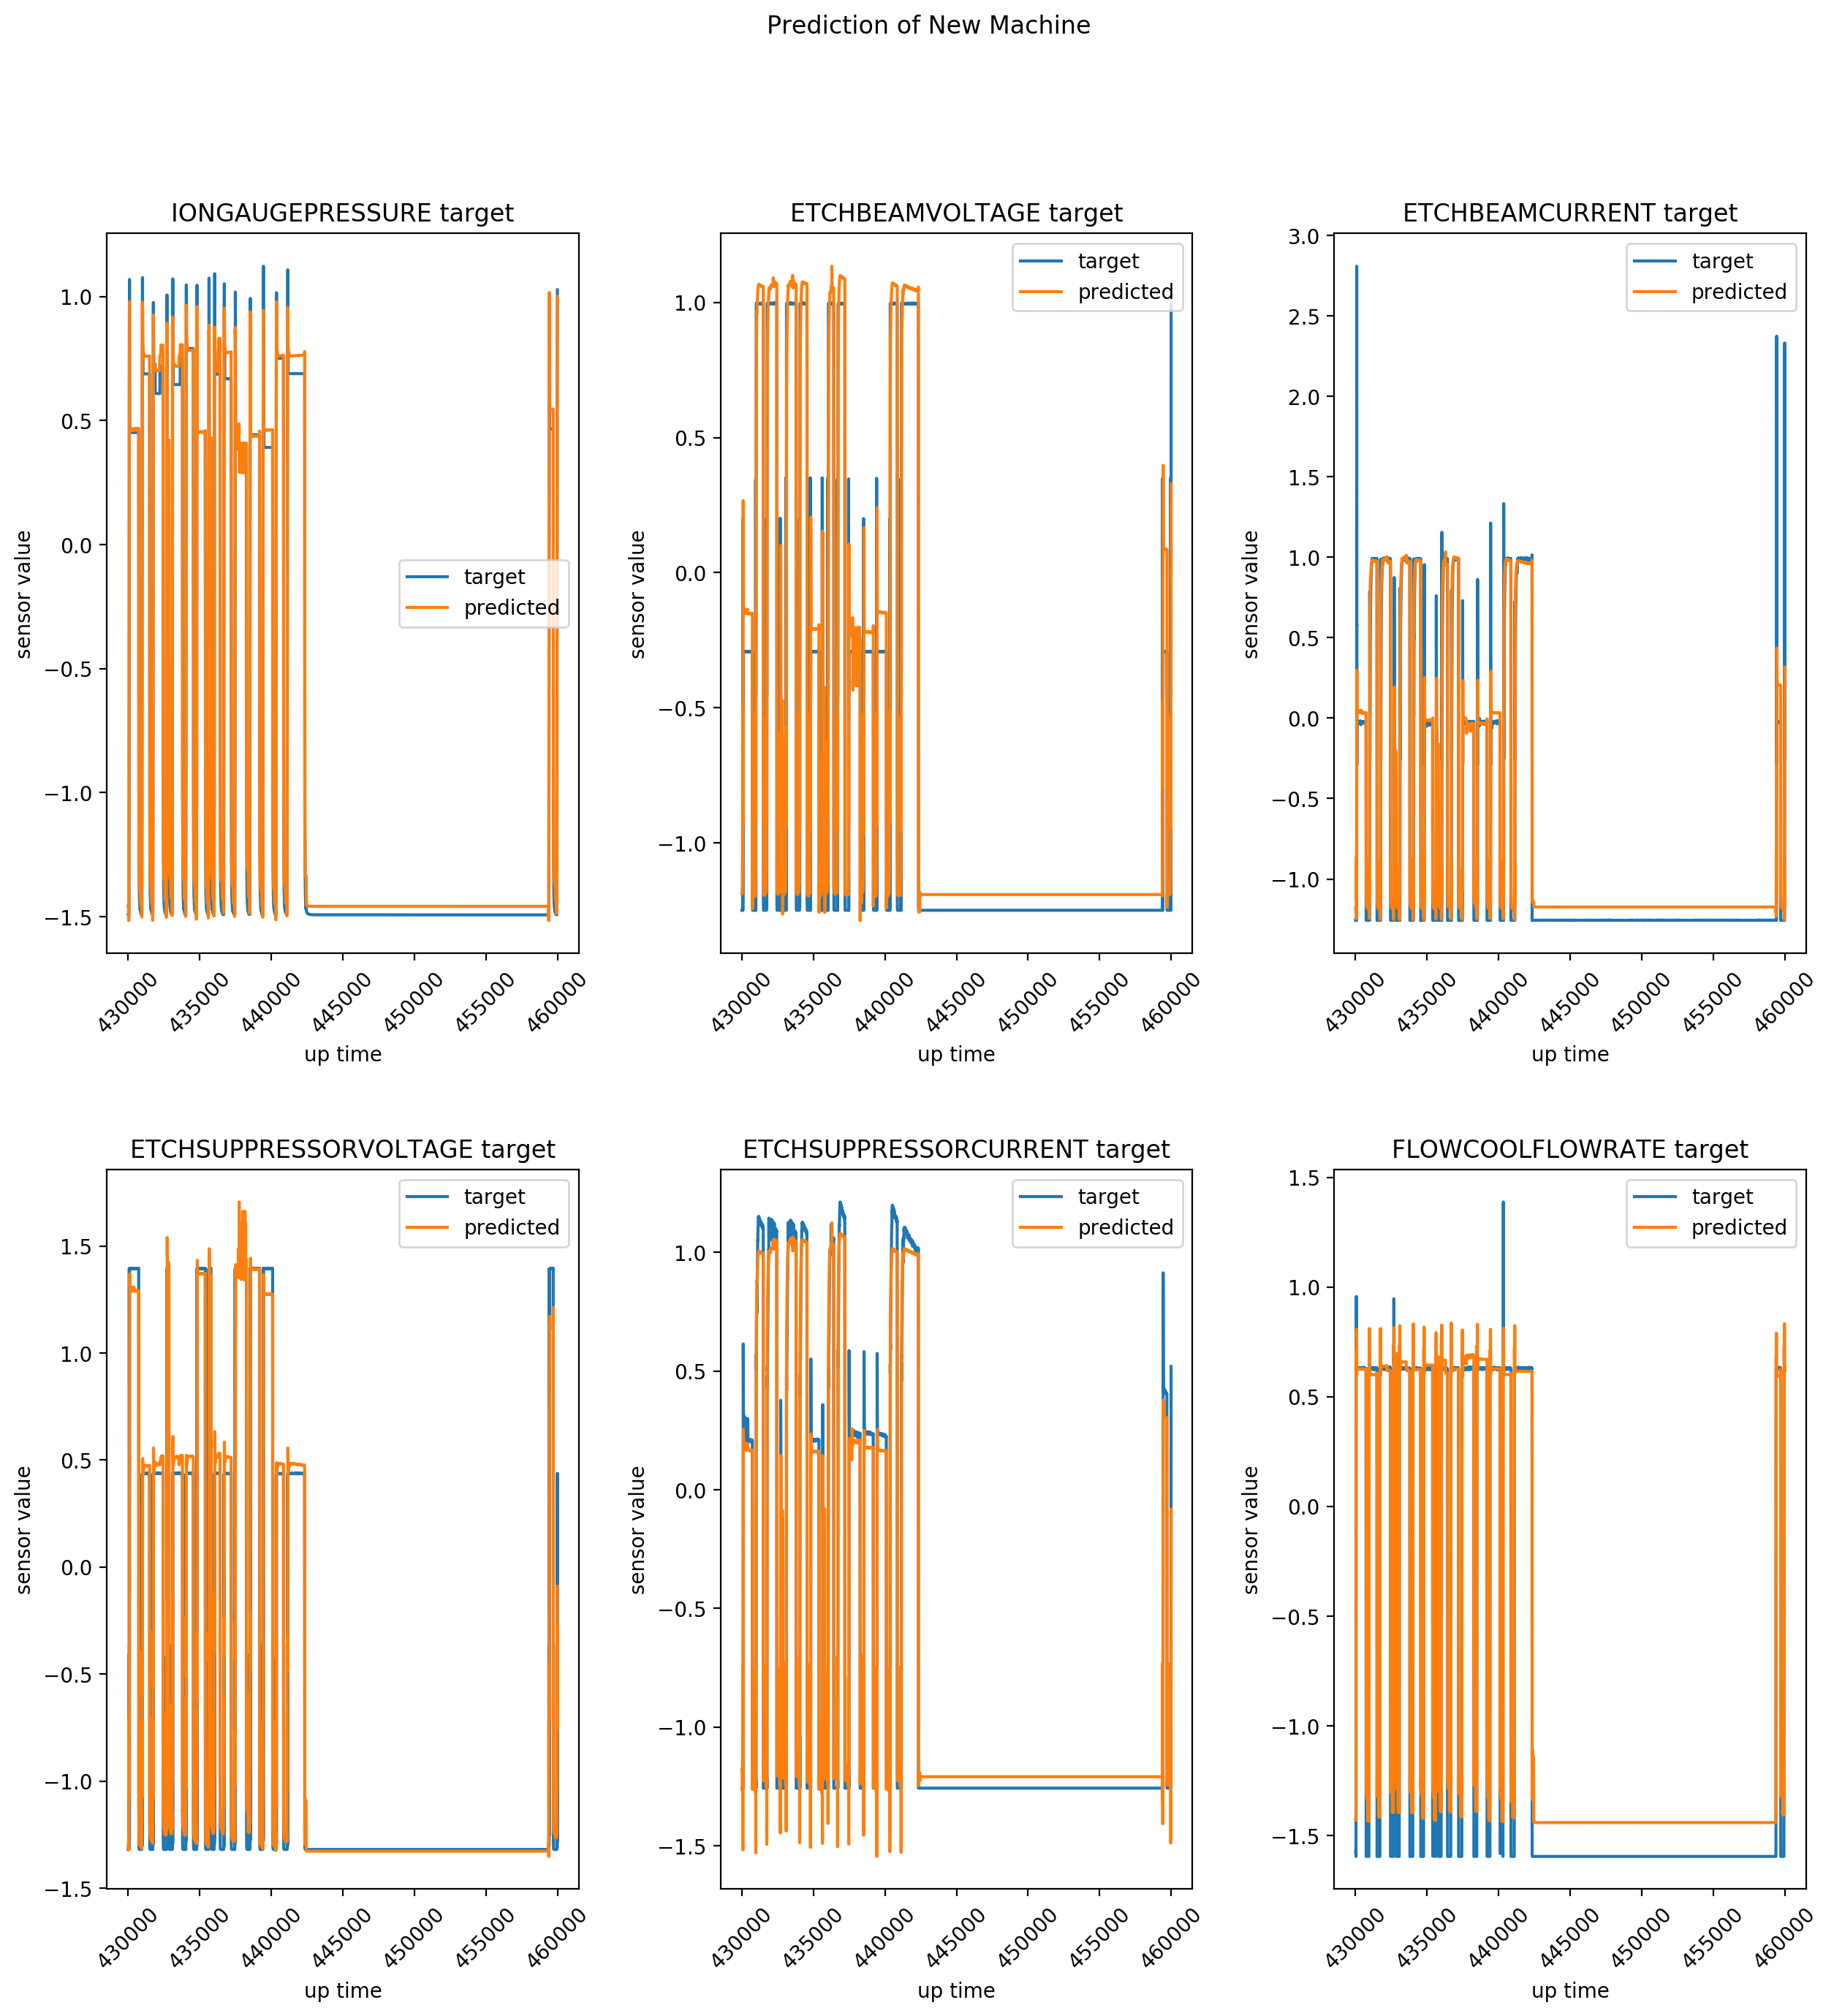

In [9]:
visualize_prediction(first_f=1, 
                     last_f=7, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_2, 
                     title="Prediction of New Machine", 
                     location_line = 0,
                     type_of_plot = "line",
                     line=False
                    )
plt.show()

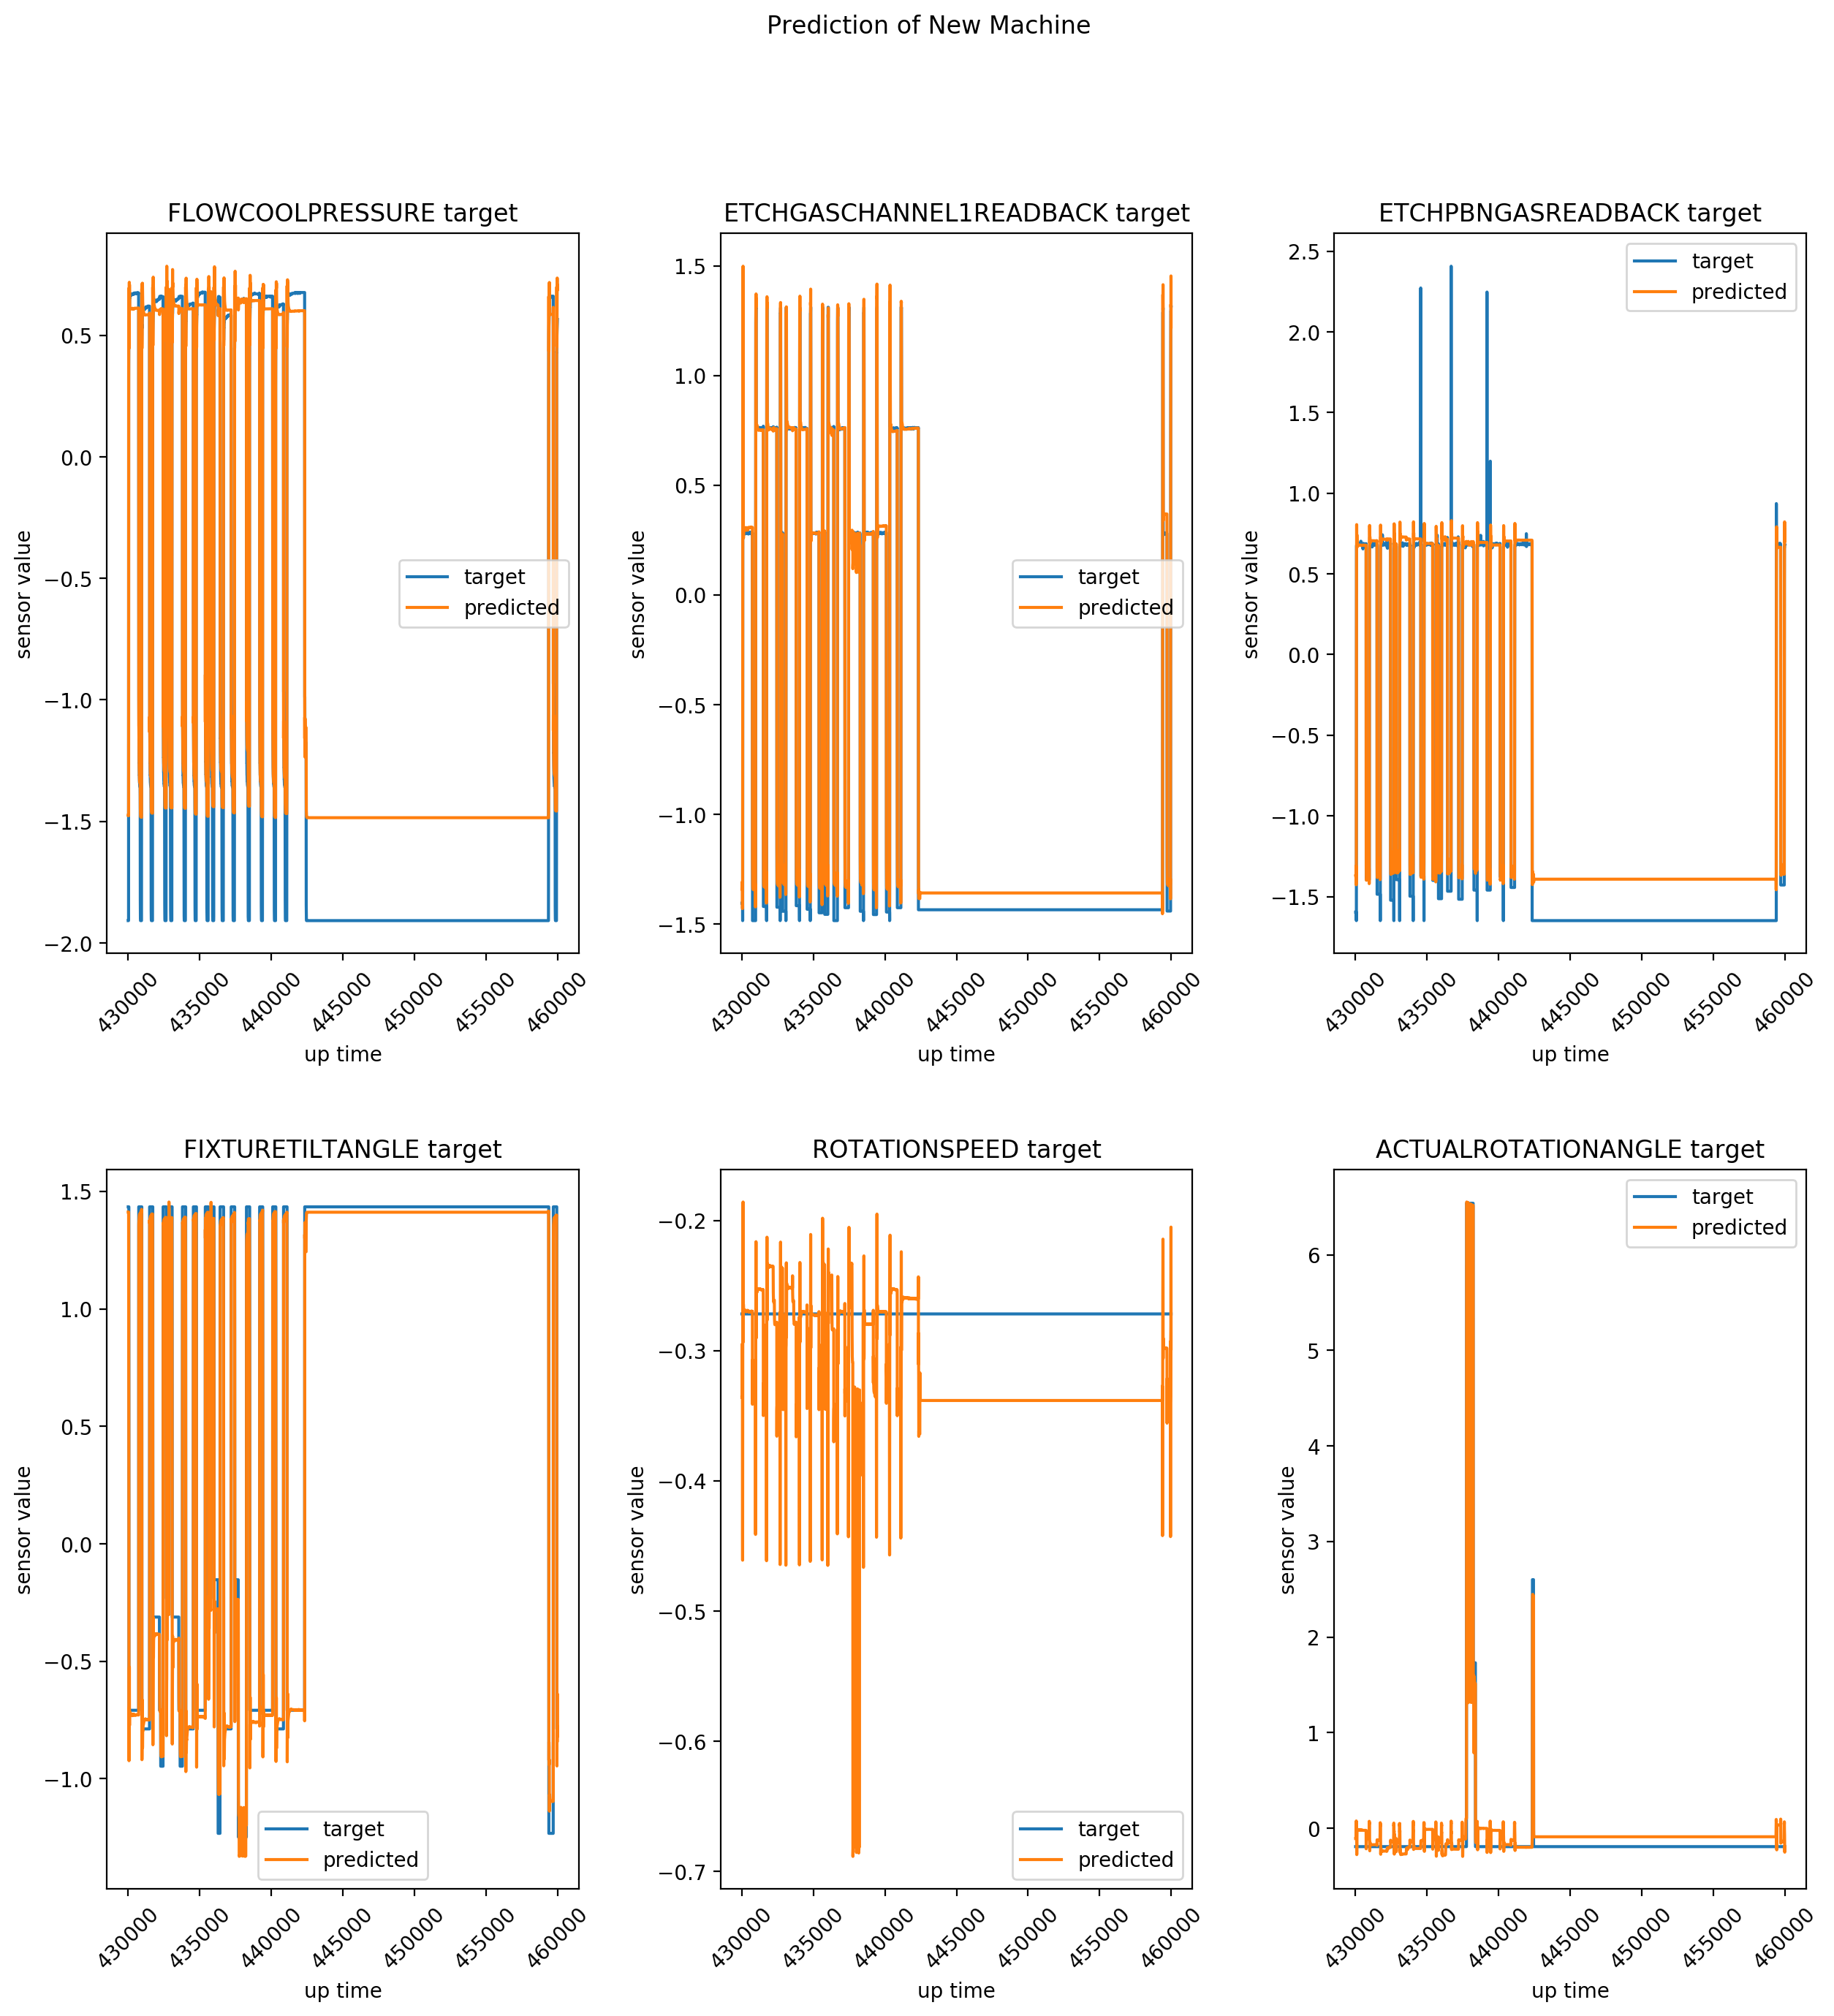

In [10]:
visualize_prediction(first_f=7, 
                     last_f=13, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_2, 
                     title="Prediction of New Machine", 
                     location_line = 0,
                     type_of_plot = "line",
                     line=False
                    )
plt.show()

## Green Erea

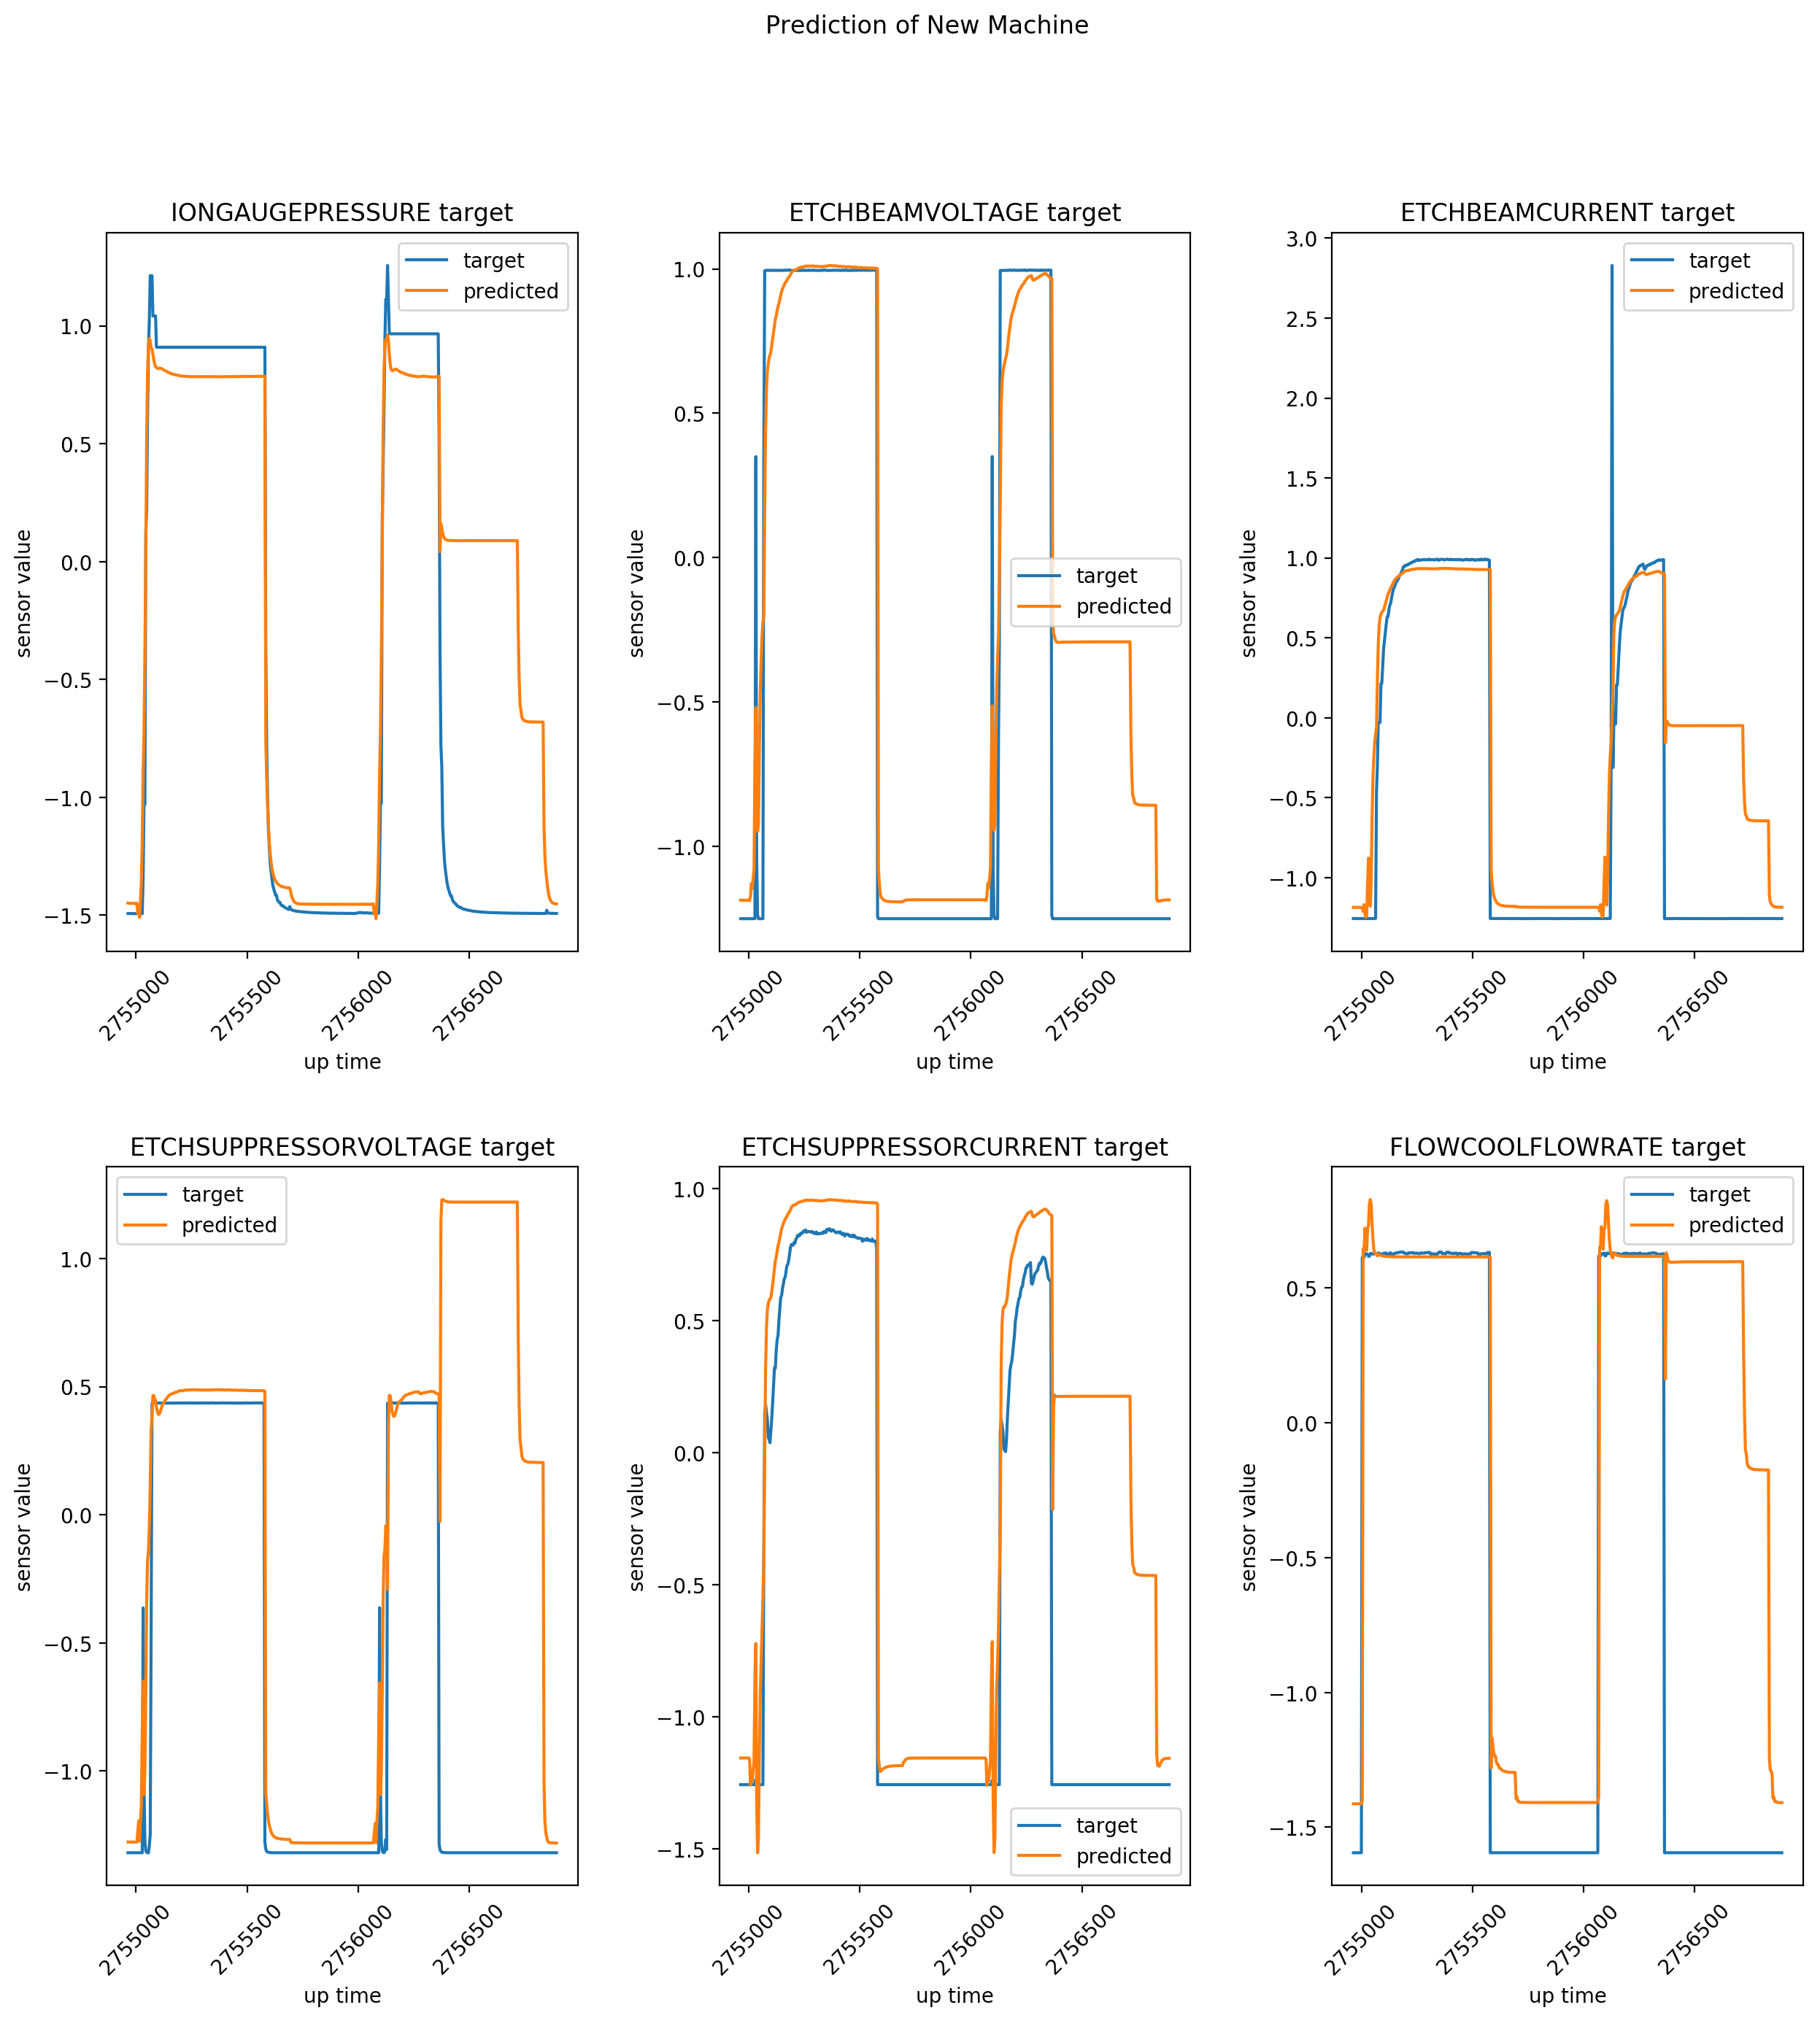

In [89]:
visualize_prediction(first_f=1, 
                     last_f=7, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_green, 
                     title="Prediction of New Machine", 
                     location_line = 0,
                     line=False
                    )
plt.show()

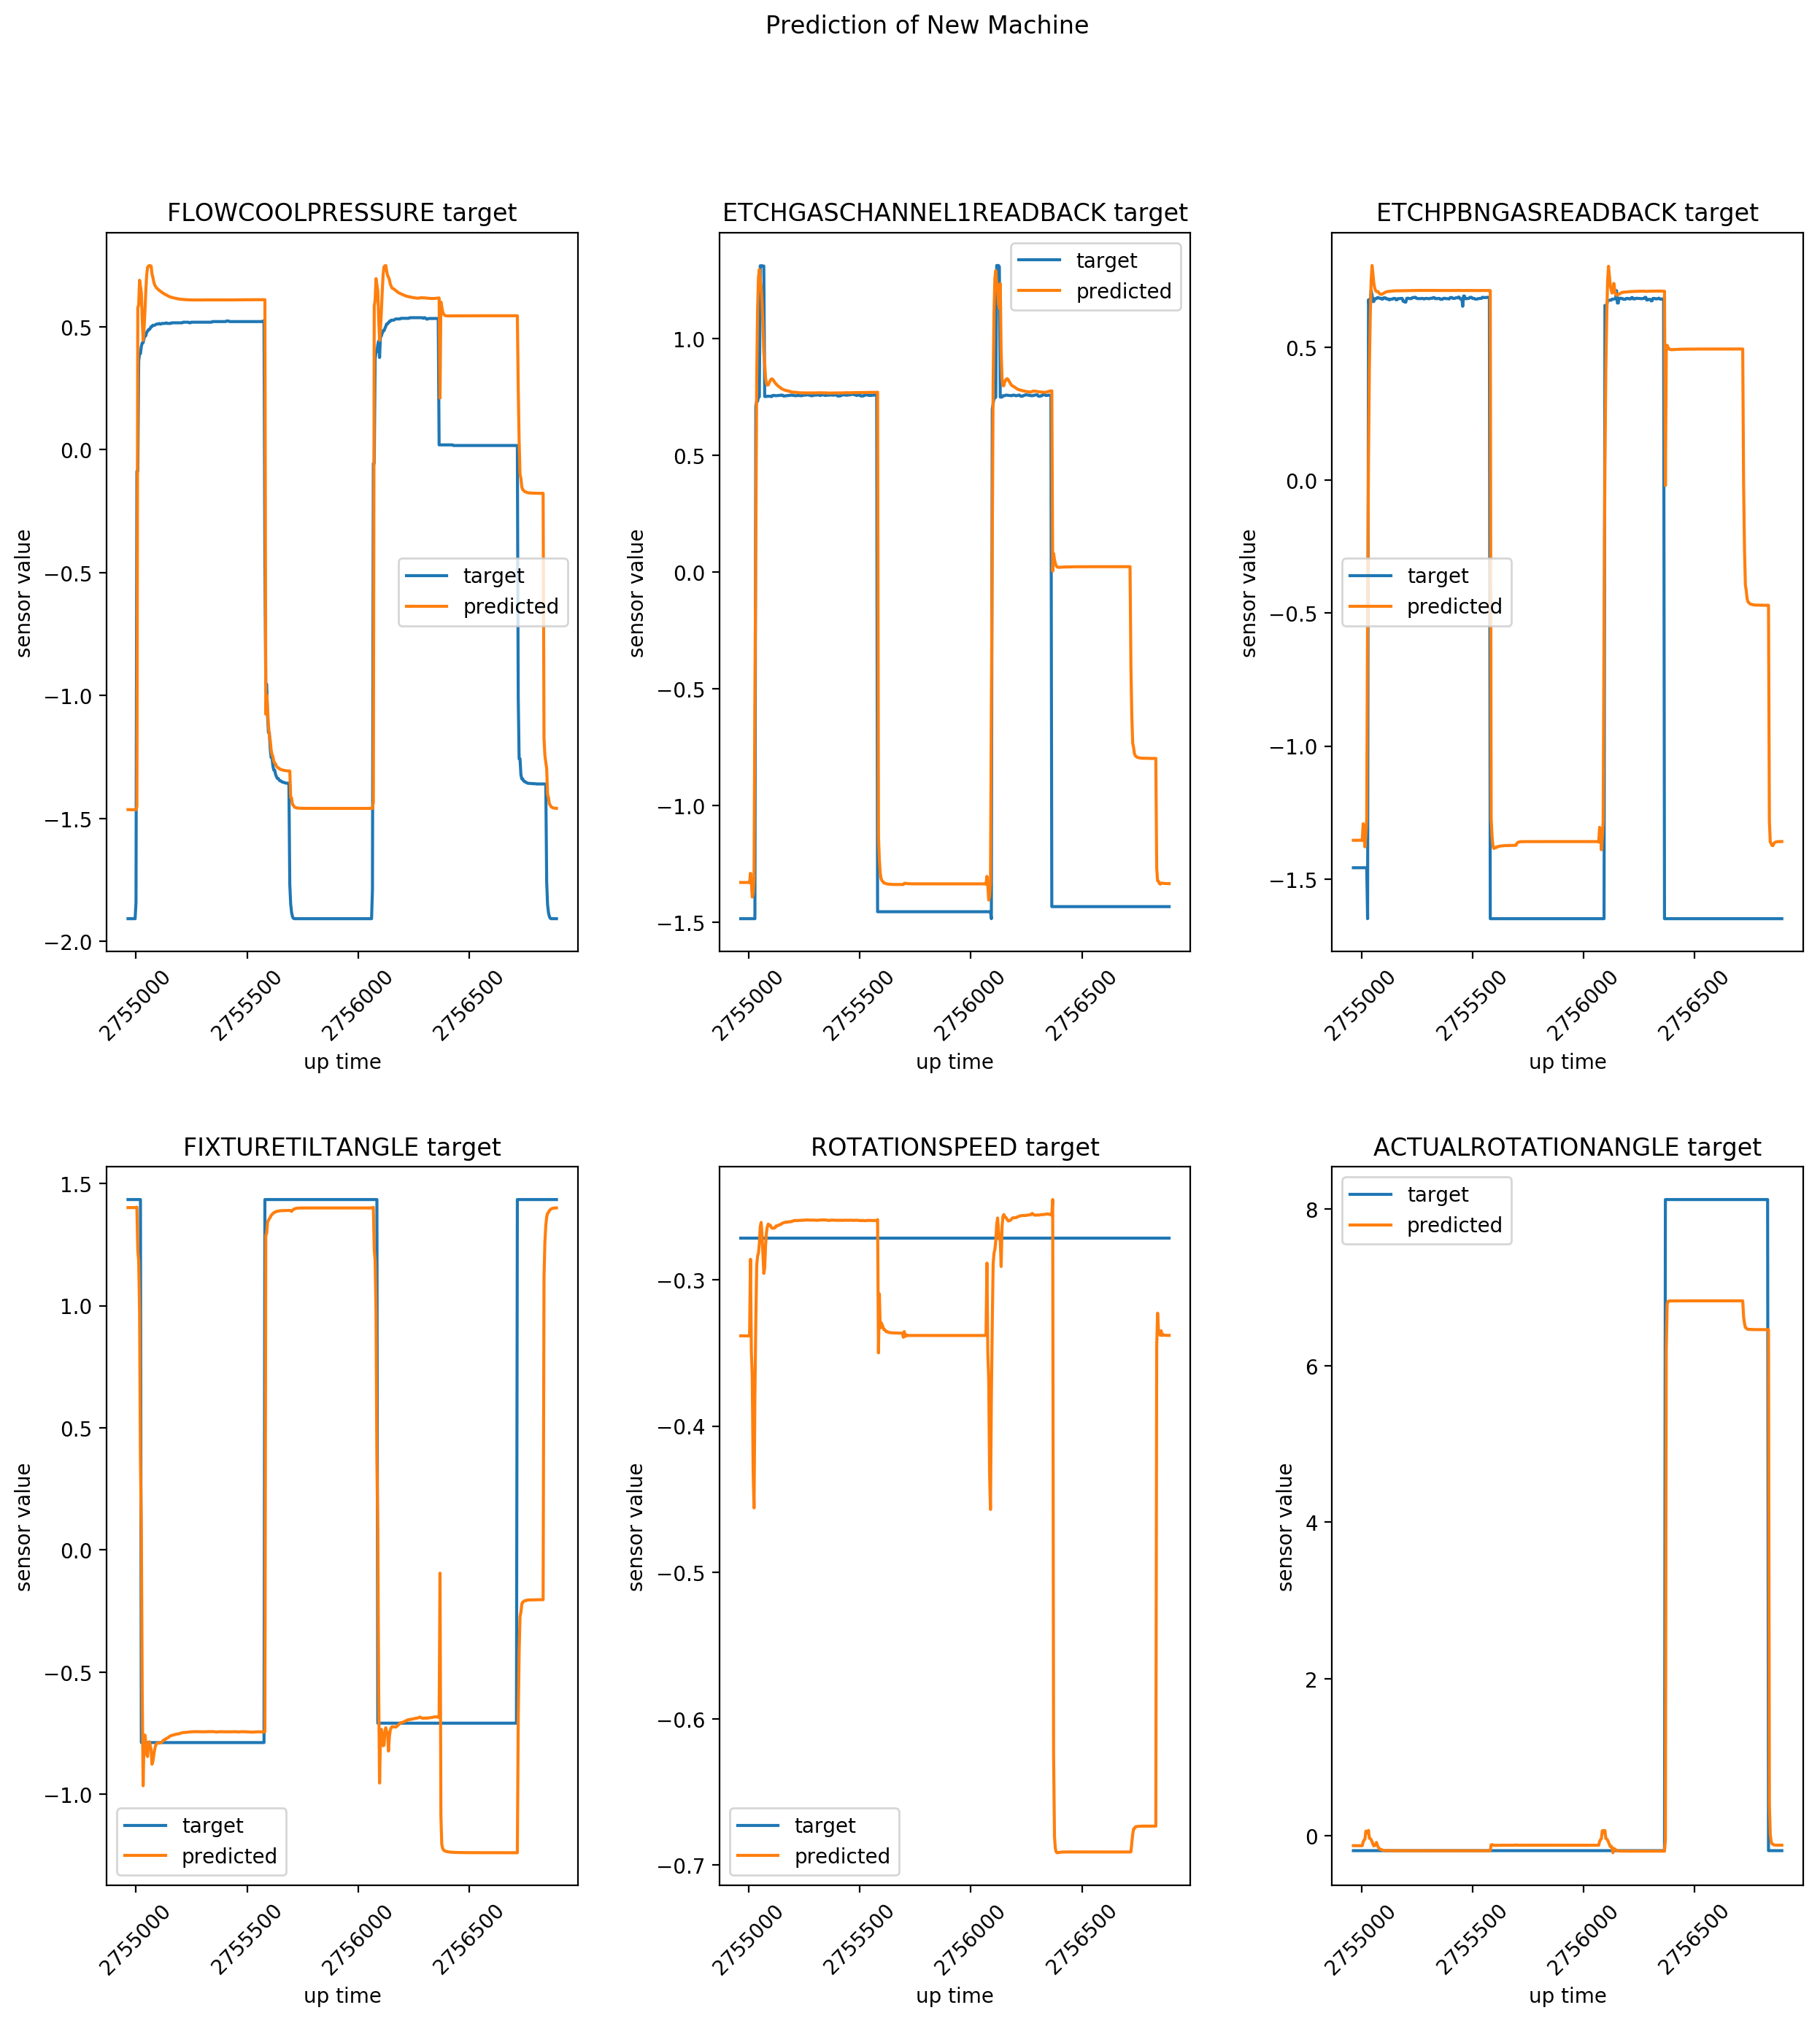

In [90]:
visualize_prediction(first_f=7, 
                     last_f=13, 
                     no_features=13, 
                     name_time_column="up time", 
                     dataframe=subset_green, 
                     title="Prediction of New Machine", 
                     location_line=0,
                     line=False
                    )
plt.show()

#### Rotationspeed (Categorical Feature???)

In [110]:
phm_data_4["ROTATIONSPEED target"].unique()

array([-0.271799  ,  3.67918921, -0.08944707, -2.24729323])

[]

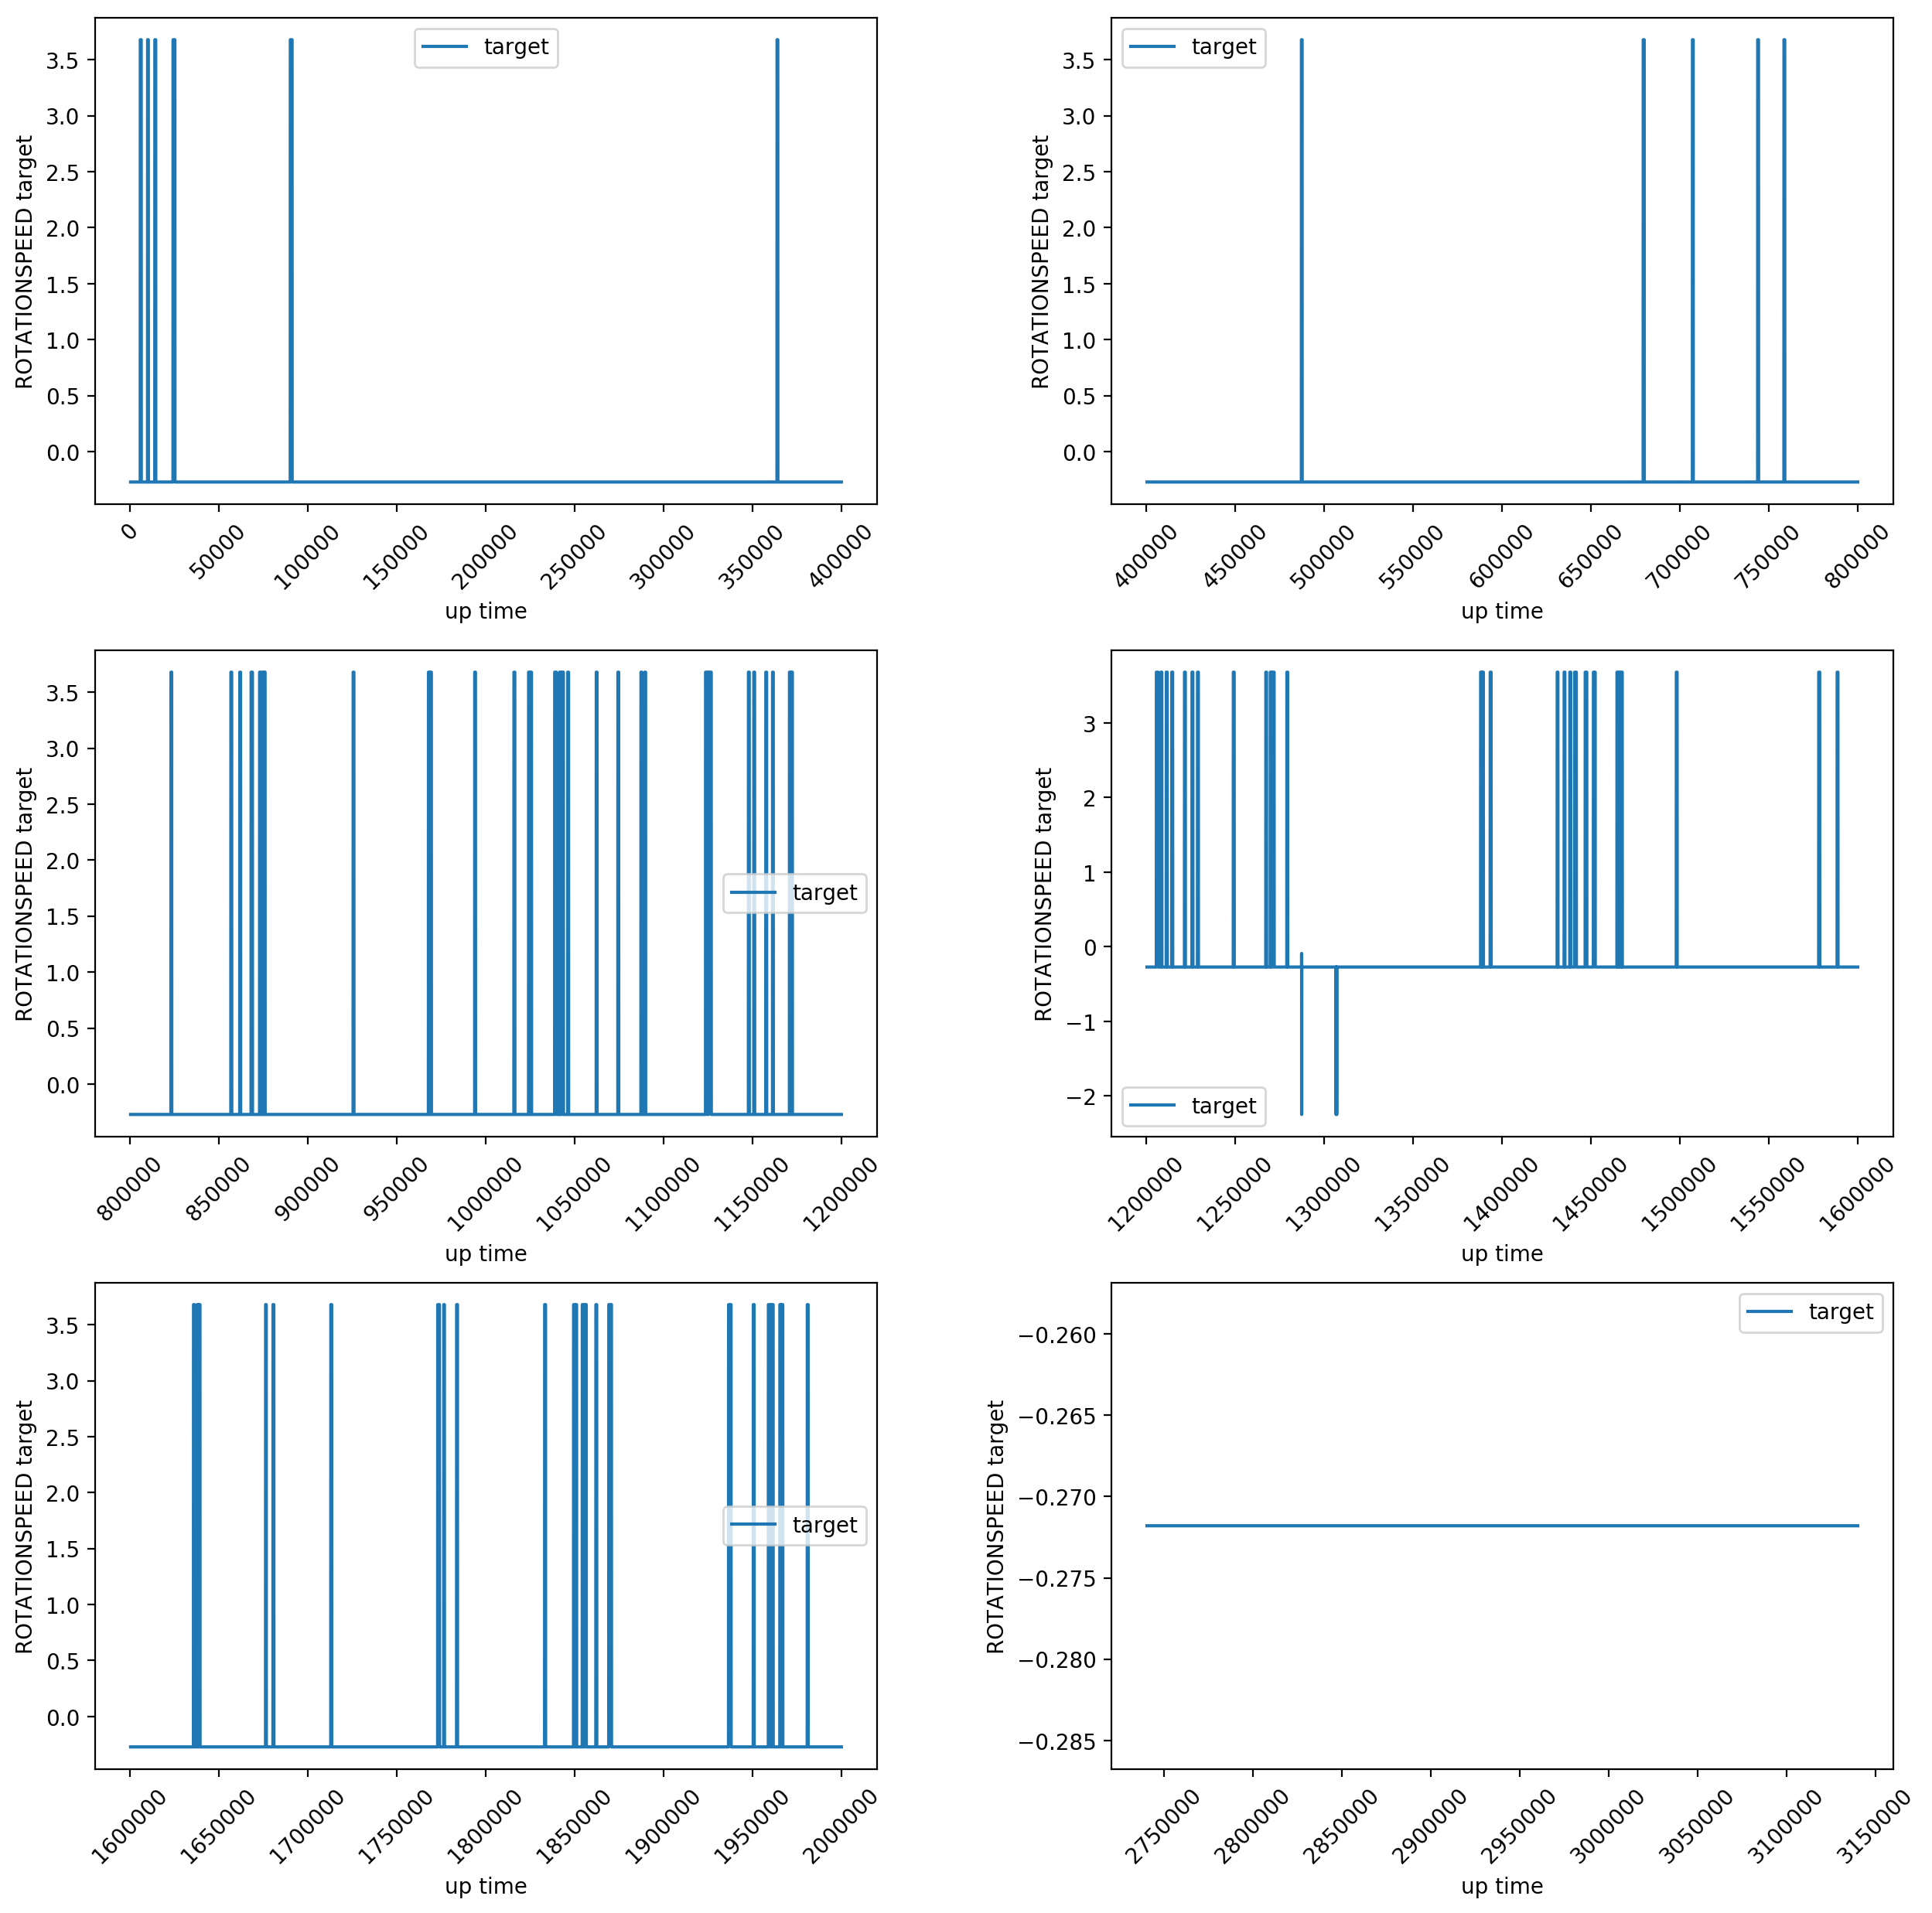

In [102]:
phm_data = [phm_data_1,phm_data_2,phm_data_3,phm_data_4,phm_data_5,phm_data_6]
fig, axes = plt.subplots(3, 2, figsize=(15,15), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.6, wspace=0.4)
for i, data in enumerate(phm_data):
    sns.lineplot(data=data, x="up time", y="ROTATIONSPEED target", ax=ax[i], label="target")
    plt.setp(ax[i].get_xticklabels(), rotation=45) 
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.plot()